<a href="https://colab.research.google.com/github/stefanomarchitto/Module-1/blob/main/Excel_processing_Basics_Colab_Module_3_backup.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Essentials :


*   openpyxl package
*   xlsxwriter package
*   workbook, worksheet, cells, columns, rows, ranges
*   write, modify data, copy/paste, append, insert, delete
*   navigate, identify locations, calculate ranges
*   computations, formulas
*   formating: fonts, colors, borders, charts


# 1.&nbsp;Set up

## Libraries

In [1]:
# libraries

import pandas as pd
import numpy as np

import os
import glob
import shutil
import sys
from pathlib import Path

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# import libraries and modules for data manipulation

!pip install openpyxl # ==> to install the package
from openpyxl.workbook import Workbook
from openpyxl import load_workbook
from openpyxl.utils import get_column_letter, column_index_from_string

More about openpyxl package
https://openpyxl.readthedocs.io

In [210]:
# import libraries and modules for formating

!pip install xlsxwriter # ==> to install the package

import xlsxwriter
from xlsxwriter.utility import xl_rowcol_to_cell
from xlsxwriter.utility import xl_col_to_name
from xlsxwriter.utility import xl_range, xl_range_abs
from xlsxwriter.utility import xl_rowcol_to_cell

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 152.8/152.8 KB 11.5 MB/s eta 0:00:00


## Drive and cwd

In [4]:
# Accessing Google Drive from Google Colab

from google.colab import drive 
drive.mount('/content/gdrive')


Mounted at /content/gdrive


In [5]:
# get absolute path to current working directory

print('The current working directory is : ')
os.getcwd() 

The current working directory is : 


'/content'

In [6]:
# current working directory
cwd = os.getcwd()
cwd

'/content'

In [7]:
# containing of /content directory
os.listdir()

['.config', 'gdrive', 'sample_data']

In [8]:
# Uncomment if need to reinitialize the downloads

'''
png_files=[]
for file in os.listdir('.'):
    if file.endswith('.png'): # or '.csv' if your'looinkg for csv files
            png_files.append(file)
            
# it will print out excel names present in current directory folder = 'Basics_Python"
print( 'there are', len(png_files), "png files ")
print(png_files[:4])

for image in png_files:
  os.unlink(image)

# containing of /content directory
os.listdir()

'''


'\npng_files=[]\nfor file in os.listdir(\'.\'):\n    if file.endswith(\'.png\'): # or \'.csv\' if your\'looinkg for csv files\n            png_files.append(file)\n            \n# it will print out excel names present in current directory folder = \'Basics_Python"\nprint( \'there are\', len(png_files), "png files ")\nprint(png_files[:4])\n\nfor image in png_files:\n  os.unlink(image)\n\n# containing of /content directory\nos.listdir()\n\n'

## Import files

In [9]:
# import files

# import files into google Colab
from google.colab import files


In [10]:
# upload from your local : images .png from your downloads
uploaded = files.upload()


Saving img_1.png to img_1.png
Saving img_2.png to img_2.png
Saving img_3.png to img_3.png
Saving img_4.png to img_4.png
Saving img_5.png to img_5.png
Saving img_6.png to img_6.png
Saving img_7.png to img_7.png
Saving img_8.png to img_8.png
Saving img_9.png to img_9.png
Saving img_10.png to img_10.png
Saving img_11.png to img_11.png
Saving img_12.png to img_12.png
Saving img_13.png to img_13.png
Saving img_14.png to img_14.png
Saving img_15.png to img_15.png
Saving img_16.png to img_16.png
Saving img_17.png to img_17.png
Saving img_18.png to img_18.png
Saving img_19.png to img_19.png
Saving img_20.png to img_20.png
Saving img_21.png to img_21.png
Saving img_22.png to img_22.png
Saving img_23.png to img_23.png
Saving img_24.png to img_24.png
Saving img_25.png to img_25.png
Saving img_26.png to img_26.png
Saving img_27.png to img_27.png
Saving img_28.png to img_28.png
Saving img_29.png to img_29.png
Saving img_30.png to img_30.png
Saving img_31.png to img_31.png
Saving img_32.png to img_3

In [11]:
# containing of /content directory, see if images were uploaded
os.listdir()

['.config',
 'img_8.png',
 'img_33.png',
 'img_37.png',
 'img_5.png',
 'img_29.png',
 'img_16.png',
 'img_7.png',
 'img_22.png',
 'img_39.png',
 'img_11.png',
 'img_6.png',
 'img_24.png',
 'img_21.png',
 'img_31.png',
 'img_35.png',
 'img_4.png',
 'img_13.png',
 'img_28.png',
 'img_25.png',
 'img_17.png',
 'img_38.png',
 'img_30.png',
 'img_18.png',
 'img_32.png',
 'img_12.png',
 'img_19.png',
 'img_14.png',
 'gdrive',
 'img_23.png',
 'img_10.png',
 'img_36.png',
 'img_27.png',
 'img_3.png',
 'img_9.png',
 'img_26.png',
 'img_15.png',
 'img_20.png',
 'img_34.png',
 'img_1.png',
 'img_2.png',
 'sample_data']

## Module_3 folder

In [14]:
# uncoment if you want to reinitilize Module_3

# delete folder Model_3 with all containing
shutil.rmtree('/content/gdrive/MyDrive/Module_3')

In [15]:
# create a floder Module_3 where you'll store files

# create a new folder called "Module_3"

# First: 
# write the path to the "Module_3" sub_directory
folder = cwd + '/' + 'gdrive/MyDrive/Module_3/images' # == > /content/gdrive/MyDrive/Module_3/images
print(folder)

# Second:
# create the folder at the indicated path
os.makedirs(folder) # create an empty folder 

/content/gdrive/MyDrive/Module_3/images


In [16]:
# check files in Module_3 directory
os.listdir('/content/gdrive/MyDrive/Module_3')

['images']

In [17]:
# containing of folder images
os.listdir('/content/gdrive/MyDrive/Module_3/images')

[]

In [18]:
# select all .png and move them to folder Module_3/Images

# searchin for all files with extention .png
# and store the into a list png_files

png_files=[]
for file in os.listdir():
    if file.endswith('.PNG'): # or '.csv' if your'looinkg for csv files
            png_files.append(file)
            
# it will print out excel names present in current directory folder = 'Basics_Python"
print( 'there are', len(png_files), "png files ")
print(png_files[:4])


there are 0 png files 
[]


In [19]:
# move all images into folder MOdule_3/Images

folder = '/content/gdrive/MyDrive/Module_3/images'

for image in png_files:
  shutil.move(image, # file/folder to cut
              folder) # folder where to move 

In [20]:
# checl if images were moved from cwd
os.listdir()

['.config',
 'img_8.png',
 'img_33.png',
 'img_37.png',
 'img_5.png',
 'img_29.png',
 'img_16.png',
 'img_7.png',
 'img_22.png',
 'img_39.png',
 'img_11.png',
 'img_6.png',
 'img_24.png',
 'img_21.png',
 'img_31.png',
 'img_35.png',
 'img_4.png',
 'img_13.png',
 'img_28.png',
 'img_25.png',
 'img_17.png',
 'img_38.png',
 'img_30.png',
 'img_18.png',
 'img_32.png',
 'img_12.png',
 'img_19.png',
 'img_14.png',
 'gdrive',
 'img_23.png',
 'img_10.png',
 'img_36.png',
 'img_27.png',
 'img_3.png',
 'img_9.png',
 'img_26.png',
 'img_15.png',
 'img_20.png',
 'img_34.png',
 'img_1.png',
 'img_2.png',
 'sample_data']

In [21]:
# check files in Module_3
os.listdir('gdrive/MyDrive/Module_3')

['images']

In [22]:
# check files present in Module_3/Images, all the images were transfered to Module_3/images
os.listdir('/content/gdrive/MyDrive/Module_3/images')

[]

In [23]:
# change cwd to Module_3
os.chdir('gdrive/MyDrive/Module_3')
# check the new current working directory now
cwd = os.getcwd()
cwd # folder MOdule_3 will be from now on our cwd

'/content/gdrive/MyDrive/Module_3'

In [24]:
# upload from your local : Groceries.xlsx
uploaded = files.upload()

Saving Groceries.xlsx to Groceries.xlsx


In [25]:
# check if Groceries.xlsx is on cwd ==> Module_3
os.listdir()

['images', 'Groceries.xlsx']

In [26]:
# check the notebook in your Colab Notebooks

os.listdir('/content/gdrive/MyDrive/Colab Notebooks')

['Test.ipynb',
 'Copy of Test.ipynb',
 'Untitled',
 'Python_Basics_Module_1 (1).ipynb',
 'Python_Basics_Module_1_Practice.ipynb',
 'Copy of Python_Basics_Module_1_Practice.ipynb',
 'Python_Basics_Module_1.ipynb',
 'Files_Manipulation_Module_2 (1).ipynb',
 'Python_Basics_Module_1_Practice_2 (2).ipynb',
 'Python_Basics_Module_1_Practice_2 (1).ipynb',
 'Files_Manipulation_Module_2.ipynb',
 'Python_Basics_Module_1_Practice_2.ipynb',
 'Excel_processing_Basics_Colab_Module_3_backup (1).ipynb',
 'Excel_processing_Basics_Colab_Module_3_backup.ipynb']

In [28]:
# copy notebook "Excel_processing_Basics_Colab_Module_3" in your cwd MOdule_3

# copy all images into folder MOdule_3/Images

folder = '/content/gdrive/MyDrive/Module_3' # path to were to move
notebook = '/content/gdrive/MyDrive/Colab Notebooks/Excel_processing_Basics_Colab_Module_3_backup.ipynb' # path from the where to get the notebook

# copy (or move) from google colab to module_3, if you like to move ==> .move
shutil.copy(notebook, # file/folder to cut/copy
            folder) # folder where to move

'/content/gdrive/MyDrive/Module_3/Excel_processing_Basics_Colab_Module_3_backup.ipynb'

In [29]:
# check again your Colab Noteboks
# if you used .move ==> than you shouldn't see your notebook in the Colab Nobooks folder
os.listdir('/content/gdrive/MyDrive/Colab Notebooks')

['Test.ipynb',
 'Copy of Test.ipynb',
 'Untitled',
 'Python_Basics_Module_1 (1).ipynb',
 'Python_Basics_Module_1_Practice.ipynb',
 'Copy of Python_Basics_Module_1_Practice.ipynb',
 'Python_Basics_Module_1.ipynb',
 'Files_Manipulation_Module_2 (1).ipynb',
 'Python_Basics_Module_1_Practice_2 (2).ipynb',
 'Python_Basics_Module_1_Practice_2 (1).ipynb',
 'Files_Manipulation_Module_2.ipynb',
 'Python_Basics_Module_1_Practice_2.ipynb',
 'Excel_processing_Basics_Colab_Module_3_backup (1).ipynb',
 'Excel_processing_Basics_Colab_Module_3_backup.ipynb']

In [ ]:
# check if notebook is in cwd

# now our folder contains:
os.listdir()

['images',
 'Groceries.xlsx',
 'Excel_processing_Basics_Colab_Module_3_backup_v2.ipynb']

# 2.&nbsp;First steps with openpyxl

Steps


1.   Create / Load workbook
2.   Worksheets
3. Cell
4. Column / Row
5. Range

## *Workbook*

In [30]:
# create workbook object
wb = Workbook()

# load excel in the workbook object
wb = load_workbook('Groceries.xlsx') # relative path
wb # the variable "wb" is our workbook

## *Worksheets*

In [31]:
# check the sheetnames
sheets = wb.sheetnames

print('the excel workbook has 3 sheets with respective sheetnames:  ')
sheets # the variable "sheets" is the list with sheetnames

the excel workbook has 3 sheets with respective sheetnames:  


['Groceries', 'Prices', 'Price_tracking']

In [32]:
# grab a sheet by name
ws = wb['Groceries'] # "ws" is the sheet "Groceries"
print(ws.title) # print the name of the sheet

# grab sheet by index
ws_1 = wb[sheets[0]] # sheets[0] will give us 2st sheet: the same "Groceries"
print(ws_1.title) # print the name of the sheet

Groceries
Groceries


## *Cell*


In [33]:
# print cell A1 from the sheet
# be aware of the difference

print(ws['A1']) # this will print out the reference of the cell
print(ws['A1'].value) # this wil print out the VALUE of the cell

<Cell 'Groceries'.A1>
Name


## *Column / Row*

In [34]:
# column A
column_A = ws['A'] # for column use letter
print('We obtain a tuple: ' )
print('Only cell references (name of column and nb of row) without values... ' )
column_A

We obtain a tuple: 
Only cell references (name of column and nb of row) without values... 


(<Cell 'Groceries'.A1>,
 <Cell 'Groceries'.A2>,
 <Cell 'Groceries'.A3>,
 <Cell 'Groceries'.A4>,
 <Cell 'Groceries'.A5>,
 <Cell 'Groceries'.A6>,
 <Cell 'Groceries'.A7>,
 <Cell 'Groceries'.A8>,
 <Cell 'Groceries'.A9>,
 <Cell 'Groceries'.A10>,
 <Cell 'Groceries'.A11>)

In [35]:
# we need to iterate in a loop, cell by cell to access the cell values from the column
for cell in column_A[:11]: # [:11] will print out till the 11th row
    print(cell.value)

Name
Kevin
Sean
Marina
Jess
Nicolas
Winston
Peter
Monica
Rachel
Lisa


In [36]:
# 1st row
row_1 = ws[1] # for row use nb of the row

# we need to add .value at the end of the cell in order to access the VALUE, 
# otherwise we obtain only the cell references
for cell in row_1:
    print(cell.value)

Name
Orange
Banana
Apples
Kiwi


## *Range*

In [37]:
# grab a range

cellrange = ws['A1:D3']
print('The nested tuple...')
print('')
print(cellrange) # it will print out as a nested tuple composed of tuples,
# each tuple containing the cell references of a row 

The nested tuple...

((<Cell 'Groceries'.A1>, <Cell 'Groceries'.B1>, <Cell 'Groceries'.C1>, <Cell 'Groceries'.D1>), (<Cell 'Groceries'.A2>, <Cell 'Groceries'.B2>, <Cell 'Groceries'.C2>, <Cell 'Groceries'.D2>), (<Cell 'Groceries'.A3>, <Cell 'Groceries'.B3>, <Cell 'Groceries'.C3>, <Cell 'Groceries'.D3>))


In [38]:
print('Iterate the cellrange in a loop .....will iterate row by row...')
print('')

# loop 
for subtuple in cellrange:
    print(subtuple)

print('')
print('....  only references are displayed without values')

Iterate the cellrange in a loop .....will iterate row by row...

(<Cell 'Groceries'.A1>, <Cell 'Groceries'.B1>, <Cell 'Groceries'.C1>, <Cell 'Groceries'.D1>)
(<Cell 'Groceries'.A2>, <Cell 'Groceries'.B2>, <Cell 'Groceries'.C2>, <Cell 'Groceries'.D2>)
(<Cell 'Groceries'.A3>, <Cell 'Groceries'.B3>, <Cell 'Groceries'.C3>, <Cell 'Groceries'.D3>)

....  only references are displayed without values


In [39]:
# to acces values we need to iterate through the nested tuple
# in the nested tuple we iterate through the inner tuples
# in the inner tuples we iterate through each item of the tuples

for tuples in cellrange: 
    for subitem in tuples:
        print(subitem.value)

print('.....note that it will iterarate in horizontal direction... ')

Name
Orange
Banana
Apples
Kevin
7
8
11
Sean
11
10
3
.....note that it will iterarate in horizontal direction... 


In [40]:
# display image
img = mpimg.imread('images/img_1.PNG')
plt.imshow(img)
plt.rcParams['figure.figsize'] = [8, 6]
plt.axis('off')
plt.show()

FileNotFoundError: ignored

# 3.&nbsp;Iterate through rows and columns

## *Rows : iter_rows()*

In [41]:
# Function iter_rows() is a method used to iterate through rows
# it will iterate in horizontal direction

# the arguments of the function are the limits of the targeted cellrange

# for every row in the cellrange [1, 3, 1, 4]
for row in ws.iter_rows(min_row=1, # the range starts at 1st row
                        max_row=3, # the range ends at 3rd row
                        min_col=1, # the range starts at 1st column
                        max_col=4): # the range ends at 5th column
    for cell in row: # access the each cell per row
        print(cell)

print('only cell referances will be displayed...')

<Cell 'Groceries'.A1>
<Cell 'Groceries'.B1>
<Cell 'Groceries'.C1>
<Cell 'Groceries'.D1>
<Cell 'Groceries'.A2>
<Cell 'Groceries'.B2>
<Cell 'Groceries'.C2>
<Cell 'Groceries'.D2>
<Cell 'Groceries'.A3>
<Cell 'Groceries'.B3>
<Cell 'Groceries'.C3>
<Cell 'Groceries'.D3>
only cell referances will be displayed...


In [42]:
# display image
img = mpimg.imread('images/img_2.PNG')
plt.imshow(img)
plt.axis('off')
plt.show()

FileNotFoundError: ignored

In [ ]:
# if we add << values_only=True >>

for row in ws.iter_rows(min_row=1, max_row=3, min_col=1, max_col=4, 
                        values_only=True): # values_only=True meanse we want to access the values
    for cell in row:
        print(cell)
    print('.........................end of row')

## *Columns : iter_cols()*

In [ ]:
# iterate through col
# it will iterate in vertically direction

for col in ws.iter_cols(min_row=1, 
                        max_row=4, 
                        min_col=1, 
                        max_col=4, 
                        values_only=True):
    for cell in col:
        print(cell)
    (print('..........end of column'))

In [ ]:
# display image
img = mpimg.imread('images/img_3.PNG')
plt.imshow(img)
plt.axis('off')
plt.show()

## Iterate mulitple rows with range()


In [43]:
# range()

# function  range() creates a sequence of numbers from 1 to 4

# starting from 0 by default, and increments by 1 (by default), 
# and stops before a specified number.

range(1, # starting from 1
      13, # upper limit is not included
      2) # step by 1, incrementation by 1

range(1, 13, 2)

In [44]:
# incrementation of + 2

for element in range(1,13, 2):
    print(element)
    
# the range end limit is not included : so the last element is 3 and NOT 4

1
3
5
7
9
11


In [45]:
# Definition: control flow is the order in which the computer executes statements in a script

# iterate through the range(1,4) that will return a sequence from 1 to 3
# each element from the sequence (here assigned as the variable row) would be our row number

# as the 1st control flow is executed, the variable row will increment by 1 
# and so we will access the second row as the row variable will update to 1+1 = 2

for row in range(1, 4):
    for cell in ws[row]:
        print('row nb:', row, cell.value)

row nb: 1 Name
row nb: 1 Orange
row nb: 1 Banana
row nb: 1 Apples
row nb: 1 Kiwi
row nb: 2 Kevin
row nb: 2 7
row nb: 2 8
row nb: 2 11
row nb: 2 4
row nb: 3 Sean
row nb: 3 11
row nb: 3 10
row nb: 3 3
row nb: 3 7


In [46]:
# display image
img = mpimg.imread('images/img_4.PNG')
plt.imshow(img)
plt.axis('off')
plt.show()

FileNotFoundError: ignored

# 4.&nbsp; Frames (max row, max col)

In [47]:
# dimensions of excel table (like df)

# get nb of rows of not blank cells of a sheet
print(ws.max_row)

# get nb of columns of not blank cells of a sheet
print(ws.max_column)

11
5


In [48]:
# display image
img = mpimg.imread('images/img_5.PNG')
plt.imshow(img)
plt.axis('off')
#plt.figure().set_figwidth(15)
plt.show()

FileNotFoundError: ignored

# 5.&nbsp; Modifications

## *Modify cell*

In [49]:
# change cell value of A2 that contained "Kevin' values
ws['A2'] = 'Alex'

# !!!! save the modification into another excel file
# !!!! don't forget to save the modifications in the excel
wb.save('Groceries_1.xlsx')

In [50]:
# reminder of ws dimensions

# get nb of rows of not blank cells of a sheet
print(ws.max_row)
# get nb of columns of not blank cells of a sheet
print(ws.max_column)

11
5


In [51]:
# see what was written
for row in ws["A1:E4"]:
    print ([x.value for x in row])

['Name', 'Orange', 'Banana', 'Apples', 'Kiwi']
['Alex', 7, 8, 11, 4]
['Sean', 11, 10, 3, 7]
['Marina', 1, 1, 5, 10]


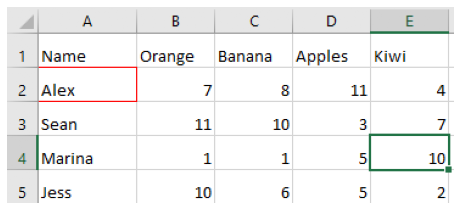

In [ ]:
# display image
img = mpimg.imread('images/img_6.PNG')
plt.imshow(img)
plt.axis('off')
plt.show()

 ## *Add cells to spreadsheet*

In [52]:
# Add a single cell using the location

ws.cell(row=12, column=1).value = 'Greg' # add value 'Greg" at row 12, column 1

# !!!! Don't forget to save the modification
wb.save('Groceries_1.xlsx')

In [53]:
# see what was written in excel
for row in ws["A8:E12"]:
    print ([x.value for x in row])

['Peter', 8, 4, 2, 8]
['Monica', 1, 8, 6, 9]
['Rachel', 4, 6, 11, 9]
['Lisa', 7, 9, 8, 10]
['Greg', None, None, None, None]


In [54]:
# see excel with rows nb
for idx, row in enumerate(ws["A8:E12"]):
  print(idx+8, [x.value for x in row])

8 ['Peter', 8, 4, 2, 8]
9 ['Monica', 1, 8, 6, 9]
10 ['Rachel', 4, 6, 11, 9]
11 ['Lisa', 7, 9, 8, 10]
12 ['Greg', None, None, None, None]


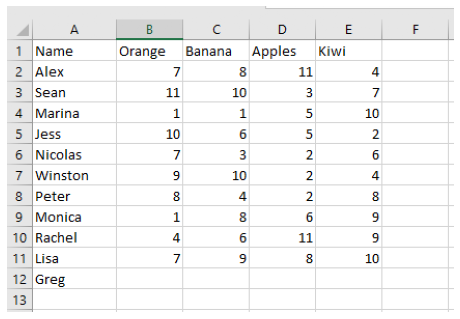

In [ ]:
# display image
img = mpimg.imread('images/img_7.PNG')
plt.imshow(img)
plt.axis('off')
plt.show()

In [55]:
# Add multiple cells

# we want to add 'Dan', 'Abagail', 'Leo' in the 1 column, starting the 13th row

# 1. create list with names we want to add
names=['Dan', 'Abagail', 'Leo']

# 2. assign a variable with row index where we want to add the cell
starting_row = 13

# 3. copy/paste with a lopp

# 3.1 copy element by element from names list and in a loop 
# 3.2 assign them in the workbook at the indicated location

for name in names:
    ws.cell(row=starting_row, column=1).value = name
    # 3.3 increment the counter
    starting_row= starting_row + 1

# !!!! Don't forget to save the modification
wb.save('Groceries_1.xlsx')

In [56]:
# reminder of ws dimensions

print(ws.max_row)
print(ws.max_column)
print('now will have 15 rows')

15
5
now will have 15 rows


In [57]:
# see excel with rows nb
for idx, row in enumerate(ws["A8:F15"]):
  print(idx+8, [x.value for x in row])

8 ['Peter', 8, 4, 2, 8, None]
9 ['Monica', 1, 8, 6, 9, None]
10 ['Rachel', 4, 6, 11, 9, None]
11 ['Lisa', 7, 9, 8, 10, None]
12 ['Greg', None, None, None, None, None]
13 ['Dan', None, None, None, None, None]
14 ['Abagail', None, None, None, None, None]
15 ['Leo', None, None, None, None, None]


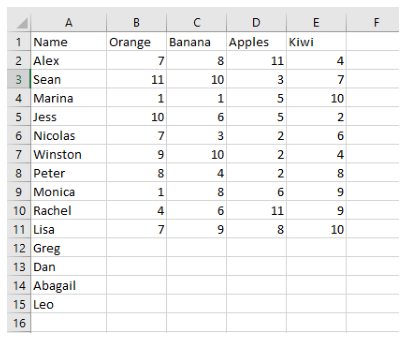

In [ ]:
# display image
img = mpimg.imread('images/img_8.PNG')
plt.imshow(img)
plt.axis('off')
plt.show()

In [58]:
# use loop to display the data cell by cell for each row, from row 11 up to 16
for row in range(11, 16):
    for cell in ws[row]:
        print('row nb: ', row, cell.value)

row nb:  11 Lisa
row nb:  11 7
row nb:  11 9
row nb:  11 8
row nb:  11 10
row nb:  11 None
row nb:  12 Greg
row nb:  12 None
row nb:  12 None
row nb:  12 None
row nb:  12 None
row nb:  12 None
row nb:  13 Dan
row nb:  13 None
row nb:  13 None
row nb:  13 None
row nb:  13 None
row nb:  13 None
row nb:  14 Abagail
row nb:  14 None
row nb:  14 None
row nb:  14 None
row nb:  14 None
row nb:  14 None
row nb:  15 Leo
row nb:  15 None
row nb:  15 None
row nb:  15 None
row nb:  15 None
row nb:  15 None


*Return data as a tuple*

In [59]:
# return data as tuples (tuple by tuple, where a subtuple is a row)
sheet_cells = []
for rows in ws.iter_rows():
    row_cells = []
    for cell in rows:
        row_cells.append(cell.value)
    sheet_cells.append(tuple(row_cells))

for row in sheet_cells:
    print(row)

('Name', 'Orange', 'Banana', 'Apples', 'Kiwi', None)
('Alex', 7, 8, 11, 4, None)
('Sean', 11, 10, 3, 7, None)
('Marina', 1, 1, 5, 10, None)
('Jess', 10, 6, 5, 2, None)
('Nicolas', 7, 3, 2, 6, None)
('Winston', 9, 10, 2, 4, None)
('Peter', 8, 4, 2, 8, None)
('Monica', 1, 8, 6, 9, None)
('Rachel', 4, 6, 11, 9, None)
('Lisa', 7, 9, 8, 10, None)
('Greg', None, None, None, None, None)
('Dan', None, None, None, None, None)
('Abagail', None, None, None, None, None)
('Leo', None, None, None, None, None)


## *Create / Delete a new sheet*

In [60]:
# change workseet title , from Groceries to Groceries_List
ws.title = 'Groceries_List'
wb.save('Groceries_1.xlsx')

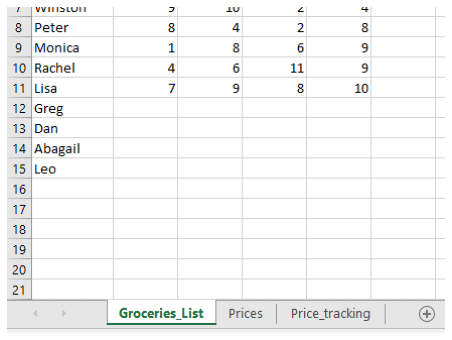

In [ ]:
# display image
img = mpimg.imread('images/img_9.PNG')
plt.imshow(img)
plt.axis('off')
plt.show()

In [61]:
# create a new sheet where 
new_sheet= wb.create_sheet(title='New_sheet')
wb.save('Groceries_1.xlsx')

In [62]:
# display image
img = mpimg.imread('images/img_10.PNG')
plt.imshow(img)
plt.axis('off')
plt.show()

FileNotFoundError: ignored

In [63]:
# observe the modifications in the sheets of the workbook
wb.sheetnames

['Groceries_List', 'Prices', 'Price_tracking', 'New_sheet']

In [64]:
# remove the sheet
wb.remove(new_sheet)  
wb.save('Groceries_1.xlsx')
wb.sheetnames

['Groceries_List', 'Prices', 'Price_tracking']

In [65]:
# display image
img = mpimg.imread('images/img_11.PNG')
plt.imshow(img)
plt.axis('off')
plt.show()

FileNotFoundError: ignored

## *Append Data*

In [66]:
# append data at the end of dataframe

# we want to add new data at the end of existing dataframe in the worksheet... 
# new data would be 3 rows that include the 3 names with their respective fruits quantity

# create a nested list that have 3 items, each item being a row in our excel
newdata = [('John', 2, 1, 3, 1), 
           ('Mark', 4, 2, 3, 1), 
           ('Eva', 5, 7, 3, 2)]

# looping through newdata to access its each item 
for item in newdata:
    ws.append(item)

# don't forget to save the modifications
# and have the excel closed
wb.save('Groceries_1.xlsx')

In [67]:
# reminder of ws dimensions
print(ws.max_row)
print(ws.max_column)


18
6


In [68]:
# see excel with rows nb
for idx, row in enumerate(ws["A8:F18"]):
  print(idx+8, [x.value for x in row])

8 ['Peter', 8, 4, 2, 8, None]
9 ['Monica', 1, 8, 6, 9, None]
10 ['Rachel', 4, 6, 11, 9, None]
11 ['Lisa', 7, 9, 8, 10, None]
12 ['Greg', None, None, None, None, None]
13 ['Dan', None, None, None, None, None]
14 ['Abagail', None, None, None, None, None]
15 ['Leo', None, None, None, None, None]
16 ['John', 2, 1, 3, 1, None]
17 ['Mark', 4, 2, 3, 1, None]
18 ['Eva', 5, 7, 3, 2, None]


In [69]:
# display image
img = mpimg.imread('images/img_12.PNG')
plt.imshow(img)
plt.axis('off')
plt.show()

FileNotFoundError: ignored

In [70]:
# use loop to display the data cell by cell for each row
for row in range(11, 19):
    for cell in ws[row]:
        print('row nb: ', row, cell.value)

row nb:  11 Lisa
row nb:  11 7
row nb:  11 9
row nb:  11 8
row nb:  11 10
row nb:  11 None
row nb:  12 Greg
row nb:  12 None
row nb:  12 None
row nb:  12 None
row nb:  12 None
row nb:  12 None
row nb:  13 Dan
row nb:  13 None
row nb:  13 None
row nb:  13 None
row nb:  13 None
row nb:  13 None
row nb:  14 Abagail
row nb:  14 None
row nb:  14 None
row nb:  14 None
row nb:  14 None
row nb:  14 None
row nb:  15 Leo
row nb:  15 None
row nb:  15 None
row nb:  15 None
row nb:  15 None
row nb:  15 None
row nb:  16 John
row nb:  16 2
row nb:  16 1
row nb:  16 3
row nb:  16 1
row nb:  16 None
row nb:  17 Mark
row nb:  17 4
row nb:  17 2
row nb:  17 3
row nb:  17 1
row nb:  17 None
row nb:  18 Eva
row nb:  18 5
row nb:  18 7
row nb:  18 3
row nb:  18 2
row nb:  18 None


# 5.1&nbsp; Copy / Paste ranges

Notice that row 12 to 15 remain (from Greg to Leo) almost emtpty

Let's copy some cell range to paste it in this rows

In [71]:
# see excel with rows nb
for idx, row in enumerate(ws["A10:F17"]):
  print(idx+10, [x.value for x in row])

10 ['Rachel', 4, 6, 11, 9, None]
11 ['Lisa', 7, 9, 8, 10, None]
12 ['Greg', None, None, None, None, None]
13 ['Dan', None, None, None, None, None]
14 ['Abagail', None, None, None, None, None]
15 ['Leo', None, None, None, None, None]
16 ['John', 2, 1, 3, 1, None]
17 ['Mark', 4, 2, 3, 1, None]


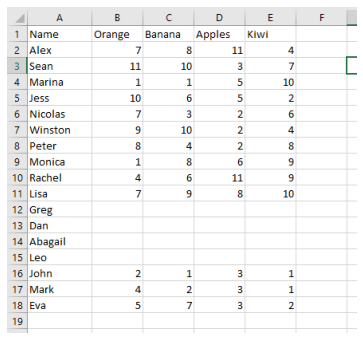

In [ ]:
# display image
img = mpimg.imread('images/img_12.PNG')
plt.imshow(img)
plt.axis('off')
plt.show()

## *Copy/Paste functions*

In [72]:
# write a function that woud copy a cell range

# Arguments : start column, start row, end column, end row and sheet you want to copy from.

def copyRange(startCol, startRow, endCol, endRow, sheet):
    rangeSelected = []
    # Loops through selected Rows
    for i in range(
      startRow,endRow + 1,1):
        # Appends the row to a RowSelected list
        rowSelected = []
        for j in range(startCol,endCol+1,1):
            rowSelected.append(sheet.cell(row = i, column = j).value)
        # Adds the RowSelected List and nests inside the rangeSelected
        rangeSelected.append(rowSelected)

    return rangeSelected

In [73]:
# write a function that woud paste a cell range

# Paste data from copyRange into template sheet
def pasteRange(startCol, startRow, endCol, endRow, sheetReceiving, copiedData):
    countRow = 0
    for i in range(startRow,endRow+1,1):
        countCol = 0
        for j in range(startCol,endCol+1,1):
            
            sheetReceiving.cell(row = i, column = j).value = copiedData[countRow][countCol]
            countCol += 1
        countRow += 1

## *Copy / paste a row*

In [74]:
selectedRange = copyRange(startCol =2,
                          startRow= 2, # Alex row: 	7,	8,	11,	4
                          endCol= 5,
                          endRow =2,
                          sheet = ws) 
print(selectedRange)

[[7, 8, 11, 4]]


In [75]:
# see excel with rows nb
for idx, row in enumerate(ws["A2:E2"]):
  print(idx+2, [x.value for x in row])

2 ['Alex', 7, 8, 11, 4]


In [76]:
# display image
img = mpimg.imread('images/img_13.PNG')
plt.imshow(img)
plt.axis('off')
plt.show()

FileNotFoundError: ignored

In [77]:
pasteRange(startCol = 2,
           startRow = 12, # Greg's row
           endCol=5, 
           endRow = 12, 
           sheetReceiving= ws,
           copiedData = selectedRange)
wb.save('Groceries_1.xlsx') 

In [78]:
# see excel with rows nb
for idx, row in enumerate(ws["A2:E13"]):
  print(idx+2, [x.value for x in row])

print('')
print('Gregs row will have the same values as Alex')

2 ['Alex', 7, 8, 11, 4]
3 ['Sean', 11, 10, 3, 7]
4 ['Marina', 1, 1, 5, 10]
5 ['Jess', 10, 6, 5, 2]
6 ['Nicolas', 7, 3, 2, 6]
7 ['Winston', 9, 10, 2, 4]
8 ['Peter', 8, 4, 2, 8]
9 ['Monica', 1, 8, 6, 9]
10 ['Rachel', 4, 6, 11, 9]
11 ['Lisa', 7, 9, 8, 10]
12 ['Greg', 7, 8, 11, 4]
13 ['Dan', None, None, None, None]

Gregs row will have the same values as Alex


In [79]:
# display image, how it was before past
# where we'd like to copy
img = mpimg.imread('images/img_14.PNG')
plt.imshow(img)
plt.axis('off')
plt.show()

FileNotFoundError: ignored

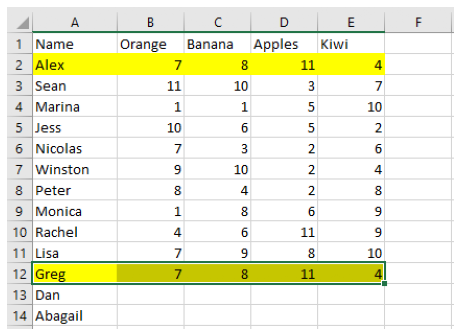

In [ ]:
# display image, after paste
# after copy/paste copy
img = mpimg.imread('images/img_15.PNG')
plt.imshow(img)
plt.axis('off')
plt.show()

**Copy paste cellrange : mulitple rows and columns**

In [80]:
selectedRange = copyRange(startCol =2,
                          startRow= 5,
                          endCol= 5,
                          endRow =7,
                          sheet = ws) 
print(selectedRange)

[[10, 6, 5, 2], [7, 3, 2, 6], [9, 10, 2, 4]]


In [81]:
# copied rows...
for idx, row in enumerate(ws["A5:E7"]):
  print(idx+5, [x.value for x in row])

5 ['Jess', 10, 6, 5, 2]
6 ['Nicolas', 7, 3, 2, 6]
7 ['Winston', 9, 10, 2, 4]


In [82]:
# the range we want to copy
img = mpimg.imread('images/img_16.PNG')
plt.imshow(img)
plt.axis('off')
plt.show()

FileNotFoundError: ignored

In [83]:
# be carefull the paste range has to have the same dimensions as the selected range

pasteRange(startCol = 2,
           startRow = 13, 
           endCol=5, 
           endRow = 15, 
           sheetReceiving= ws,
           copiedData = selectedRange)
wb.save('Groceries_1.xlsx') 

In [84]:
# copied rows...
for idx, row in enumerate(ws["A13:E15"]):
  print(idx+13, [x.value for x in row])

13 ['Dan', 10, 6, 5, 2]
14 ['Abagail', 7, 3, 2, 6]
15 ['Leo', 9, 10, 2, 4]


In [85]:
# after copy pasting the range
img = mpimg.imread('images/img_17.PNG')
plt.imshow(img)
plt.axis('off')
plt.show()

FileNotFoundError: ignored

# 5.2&nbsp; Write / copy a list in a cell range

In [86]:
# reminder
for idx, row in enumerate(ws["A13:E18"]):
  print(idx+13, [x.value for x in row])

13 ['Dan', 10, 6, 5, 2]
14 ['Abagail', 7, 3, 2, 6]
15 ['Leo', 9, 10, 2, 4]
16 ['John', 2, 1, 3, 1]
17 ['Mark', 4, 2, 3, 1]
18 ['Eva', 5, 7, 3, 2]


In [87]:
# we want to write in the excel some data 'Tom', 8, 2, 3, 2

cellrange = ['Tom', 8, 2, 3, 2]
print(cellrange)
print(len(cellrange))

['Tom', 8, 2, 3, 2]
5


In [88]:
print('the length of cellrange is ', len(cellrange))
print('   ')

# iterate through the cellrange
# we use len(cellange) so we won't need to intervene manually to get the legnth of the cellrange
for i in range(0, len(cellrange)):
    print(i)

the length of cellrange is  5
   
0
1
2
3
4


In [89]:
# befor we write cellrange at row 21

ws.max_row

18

In [90]:
# to write the data in the excel...
# 1. indicate the location where to write..
# 2. target_row ==> at what row, column ==> at what column start writing
# 3. assign each cell value at indicated location the elements from the data in the cellrange

target_row= 21
for i in range(0, len(cellrange)):
    # give values to cells
    ws.cell(row = target_row, # at what row
            # at what column, incrementation by +1
            # innitially our i=0, we'll add + 1 to obtain the column 1
            column = i+1).value= cellrange[i] # add .value to assign value 
                                              # = cellrange[0] (==> "Tom" at 1st loop)
    
# save the modifications
wb.save('Groceries_1.xlsx')     

In [91]:
ws.max_row

21

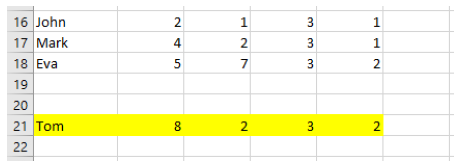

In [ ]:
# after we write data at row 21
img = mpimg.imread('images/img_18.PNG')
plt.imshow(img)
plt.axis('off')
plt.show()

In [92]:
# see excel with rows nb
for idx, row in enumerate(ws["A17:E21"]):
  print(idx+17, [x.value for x in row])

17 ['Mark', 4, 2, 3, 1]
18 ['Eva', 5, 7, 3, 2]
19 [None, None, None, None, None]
20 [None, None, None, None, None]
21 ['Tom', 8, 2, 3, 2]


# 5.3&nbsp; Move / Insert / Remove

## *Move*

In [93]:
# function _move_cell

# we want to move cell from B21 with '8' value to 
ws._move_cell(row =21, 
              column= 2, 
              row_offset= -1, # negative goes up, postivie goes down (here 1 row up)
              col_offset = 0) # negative to left, postivie to the right (here 0 means do not move column)

wb.save('Groceries_1.xlsx')

In [94]:
# shift B21 with -1 offset (in Excel would be like cut/paste B21 to B20)
img = mpimg.imread('images/img_19.PNG')
plt.imshow(img)
plt.axis('off')
plt.show()

FileNotFoundError: ignored

In [95]:
ws.max_row

21

In [96]:
# see excel with rows nb
for idx, row in enumerate(ws["A18:E21"]):
  print(idx+18, [x.value for x in row])

18 ['Eva', 5, 7, 3, 2]
19 [None, None, None, None, None]
20 [None, 8, None, None, None]
21 ['Tom', None, 2, 3, 2]


In [97]:
# For now the dimensions of our ws is 21 rows

# if we iterate through ws but giving  a bigger range : "A18:E22"

for idx, row in enumerate(ws["A18:E22"]):
  print(idx+18, [x.value for x in row])

print('')
print('the nb of rows of ws will increase to..', ws.max_row)

18 ['Eva', 5, 7, 3, 2]
19 [None, None, None, None, None]
20 [None, 8, None, None, None]
21 ['Tom', None, 2, 3, 2]
22 [None, None, None, None, None]

the nb of rows of ws will increase to.. 22


In [98]:
# function _move_range

ws.move_range("A21:E21", # the range we want to move (here Tome row
               rows= -2, # how many rows to shift 
               cols = 0) # how many columns to shift
wb.save('Groceries_1.xlsx')


# see the excel with modifications
for idx, row in enumerate(ws['A17:E22']):
   print(idx+17, [x.value for x in row])

17 ['Mark', 4, 2, 3, 1]
18 ['Eva', 5, 7, 3, 2]
19 ['Tom', None, 2, 3, 2]
20 [None, 8, None, None, None]
21 [None, None, None, None, None]
22 [None, None, None, None, None]


In [99]:
ws.max_row

22

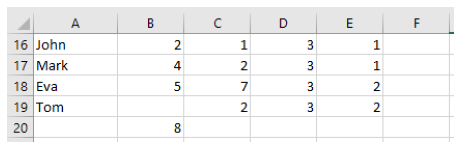

In [ ]:
# Tom now is at row 19
img = mpimg.imread('images/img_20.PNG')
plt.imshow(img)
plt.axis('off')
plt.show()

In [100]:
# example of overwrite

ws.move_range("A18:E18", # the range we want to move (here Eva row)
               rows= -2, # how many rows to shift (John row)
               cols = 0) # how many columns to shift
wb.save('Groceries_1.xlsx')

In [101]:
# Eva row woas moved to row 16 (John's row) (it was overritten)
# and the previous Eva's row (18) remained None

# see the excel with modifications
for idx, row in enumerate(ws['A16:E22']):
   print(idx+16, [x.value for x in row])

16 ['Eva', 5, 7, 3, 2]
17 ['Mark', 4, 2, 3, 1]
18 [None, None, None, None, None]
19 ['Tom', None, 2, 3, 2]
20 [None, 8, None, None, None]
21 [None, None, None, None, None]
22 [None, None, None, None, None]


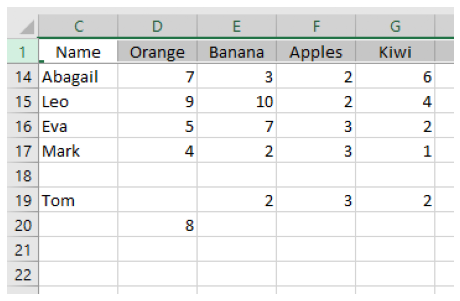

In [ ]:
img = mpimg.imread('images/img_21.PNG')
plt.imshow(img)
plt.axis('off')
plt.show()

## *Insert*

In [102]:
for idx, row in enumerate(ws['A1:E22']):
   print(idx+1, [x.value for x in row])

1 ['Name', 'Orange', 'Banana', 'Apples', 'Kiwi']
2 ['Alex', 7, 8, 11, 4]
3 ['Sean', 11, 10, 3, 7]
4 ['Marina', 1, 1, 5, 10]
5 ['Jess', 10, 6, 5, 2]
6 ['Nicolas', 7, 3, 2, 6]
7 ['Winston', 9, 10, 2, 4]
8 ['Peter', 8, 4, 2, 8]
9 ['Monica', 1, 8, 6, 9]
10 ['Rachel', 4, 6, 11, 9]
11 ['Lisa', 7, 9, 8, 10]
12 ['Greg', 7, 8, 11, 4]
13 ['Dan', 10, 6, 5, 2]
14 ['Abagail', 7, 3, 2, 6]
15 ['Leo', 9, 10, 2, 4]
16 ['Eva', 5, 7, 3, 2]
17 ['Mark', 4, 2, 3, 1]
18 [None, None, None, None, None]
19 ['Tom', None, 2, 3, 2]
20 [None, 8, None, None, None]
21 [None, None, None, None, None]
22 [None, None, None, None, None]


In [103]:
# insert rows

ws.insert_rows(idx=10, # row index location
               amount=2) # how many rows to insert
wb.save('Groceries_1.xlsx') 

# see what was written

for idx, row in enumerate(ws['A1:E24']):
   print(idx+1, [x.value for x in row])

1 ['Name', 'Orange', 'Banana', 'Apples', 'Kiwi']
2 ['Alex', 7, 8, 11, 4]
3 ['Sean', 11, 10, 3, 7]
4 ['Marina', 1, 1, 5, 10]
5 ['Jess', 10, 6, 5, 2]
6 ['Nicolas', 7, 3, 2, 6]
7 ['Winston', 9, 10, 2, 4]
8 ['Peter', 8, 4, 2, 8]
9 ['Monica', 1, 8, 6, 9]
10 [None, None, None, None, None]
11 [None, None, None, None, None]
12 ['Rachel', 4, 6, 11, 9]
13 ['Lisa', 7, 9, 8, 10]
14 ['Greg', 7, 8, 11, 4]
15 ['Dan', 10, 6, 5, 2]
16 ['Abagail', 7, 3, 2, 6]
17 ['Leo', 9, 10, 2, 4]
18 ['Eva', 5, 7, 3, 2]
19 ['Mark', 4, 2, 3, 1]
20 [None, None, None, None, None]
21 ['Tom', None, 2, 3, 2]
22 [None, 8, None, None, None]
23 [None, None, None, None, None]
24 [None, None, None, None, None]


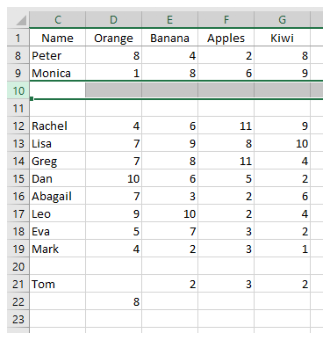

In [ ]:
# inserted rows
img = mpimg.imread('images/img_22.PNG')
plt.imshow(img)
plt.axis('off')
plt.show()

In [104]:
# now the nb of ws rows has increased as well
ws.max_row

24

In [105]:
# insert columns
ws.insert_cols(idx=1, # col index location
               amount=1) # how many cols to insert

wb.save('Groceries_1.xlsx') 

# see excel with rows nb
for idx, row in enumerate(ws["A1:F12"]):
  print(idx+1, [x.value for x in row])

1 [None, 'Name', 'Orange', 'Banana', 'Apples', 'Kiwi']
2 [None, 'Alex', 7, 8, 11, 4]
3 [None, 'Sean', 11, 10, 3, 7]
4 [None, 'Marina', 1, 1, 5, 10]
5 [None, 'Jess', 10, 6, 5, 2]
6 [None, 'Nicolas', 7, 3, 2, 6]
7 [None, 'Winston', 9, 10, 2, 4]
8 [None, 'Peter', 8, 4, 2, 8]
9 [None, 'Monica', 1, 8, 6, 9]
10 [None, None, None, None, None, None]
11 [None, None, None, None, None, None]
12 [None, 'Rachel', 4, 6, 11, 9]


In [106]:
# nb of columns has increased
ws.max_column

7

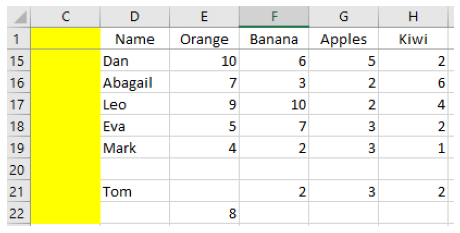

In [ ]:
# inserted cols 
img = mpimg.imread('images/img_23.PNG')
plt.imshow(img)
plt.axis('off')
plt.show()

In [107]:
# show an example of insertion of values

# cellrange data we want to insert
cellrange = ['Rob', 12, 2, 3, 2] # insert 'Rob' at between Alex and Sean

# 1st, insert an empty rows
ws.insert_rows(idx=2, # row index location
               amount=1) # how many row to insert

# write cellrange to this insertd row

target_row= 2
for i in range(0, len(cellrange)):
    # give values to cells
    ws.cell(row = target_row, # at what row
            # at what column, incrementation by +1
            # innitially our i=0, we'll add + 2 to obtain the column 2
            column = i+2).value= cellrange[i] # add .value to assign value 
                                              # = cellrange[0] (==> "Rob" at 1st loop)
    
# save the modifications in excel
wb.save('Groceries_1.xlsx')     

In [108]:
# see excel with rows nb
for idx, row in enumerate(ws["A1:F4"]):
  print(idx+1, [x.value for x in row])

1 [None, 'Name', 'Orange', 'Banana', 'Apples', 'Kiwi']
2 [None, 'Rob', 12, 2, 3, 2]
3 [None, 'Alex', 7, 8, 11, 4]
4 [None, 'Sean', 11, 10, 3, 7]


## *Delete*

In [109]:
ws.max_row

25

In [110]:
for idx, row in enumerate(ws['A20:F24']):
   print(idx+20, [x.value for x in row])

20 [None, 'Mark', 4, 2, 3, 1]
21 [None, None, None, None, None, None]
22 [None, 'Tom', None, 2, 3, 2]
23 [None, None, 8, None, None, None]
24 [None, None, None, None, None, None]


In [111]:
# delete a cell

ws.cell(row=23, column=3).value = None # we want cell C23 to be blank
wb.save('Groceries_1.xlsx')

for idx, row in enumerate(ws['A20:F24']):
   print(idx+20, [x.value for x in row])

20 [None, 'Mark', 4, 2, 3, 1]
21 [None, None, None, None, None, None]
22 [None, 'Tom', None, 2, 3, 2]
23 [None, None, None, None, None, None]
24 [None, None, None, None, None, None]


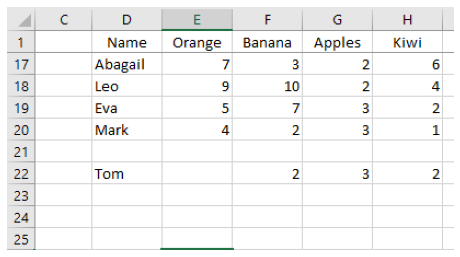

In [ ]:
# removed cell (we have remove value 8, from row 23, col 3
img = mpimg.imread('images/img_24.PNG')
plt.imshow(img)
plt.axis('off')
plt.show()

In [112]:
for idx, row in enumerate(ws['A1:F25']):
   print(idx+1, [x.value for x in row])

1 [None, 'Name', 'Orange', 'Banana', 'Apples', 'Kiwi']
2 [None, 'Rob', 12, 2, 3, 2]
3 [None, 'Alex', 7, 8, 11, 4]
4 [None, 'Sean', 11, 10, 3, 7]
5 [None, 'Marina', 1, 1, 5, 10]
6 [None, 'Jess', 10, 6, 5, 2]
7 [None, 'Nicolas', 7, 3, 2, 6]
8 [None, 'Winston', 9, 10, 2, 4]
9 [None, 'Peter', 8, 4, 2, 8]
10 [None, 'Monica', 1, 8, 6, 9]
11 [None, None, None, None, None, None]
12 [None, None, None, None, None, None]
13 [None, 'Rachel', 4, 6, 11, 9]
14 [None, 'Lisa', 7, 9, 8, 10]
15 [None, 'Greg', 7, 8, 11, 4]
16 [None, 'Dan', 10, 6, 5, 2]
17 [None, 'Abagail', 7, 3, 2, 6]
18 [None, 'Leo', 9, 10, 2, 4]
19 [None, 'Eva', 5, 7, 3, 2]
20 [None, 'Mark', 4, 2, 3, 1]
21 [None, None, None, None, None, None]
22 [None, 'Tom', None, 2, 3, 2]
23 [None, None, None, None, None, None]
24 [None, None, None, None, None, None]
25 [None, None, None, None, None, None]


In [113]:
# delete rows 11 & 12

ws.delete_rows(idx=11, amount=2) # the empty rows
wb.save('Groceries_1.xlsx') 

# see what was written

for idx, row in enumerate(ws['A1:F25']):
   print(idx+1, [x.value for x in row])

1 [None, 'Name', 'Orange', 'Banana', 'Apples', 'Kiwi']
2 [None, 'Rob', 12, 2, 3, 2]
3 [None, 'Alex', 7, 8, 11, 4]
4 [None, 'Sean', 11, 10, 3, 7]
5 [None, 'Marina', 1, 1, 5, 10]
6 [None, 'Jess', 10, 6, 5, 2]
7 [None, 'Nicolas', 7, 3, 2, 6]
8 [None, 'Winston', 9, 10, 2, 4]
9 [None, 'Peter', 8, 4, 2, 8]
10 [None, 'Monica', 1, 8, 6, 9]
11 [None, 'Rachel', 4, 6, 11, 9]
12 [None, 'Lisa', 7, 9, 8, 10]
13 [None, 'Greg', 7, 8, 11, 4]
14 [None, 'Dan', 10, 6, 5, 2]
15 [None, 'Abagail', 7, 3, 2, 6]
16 [None, 'Leo', 9, 10, 2, 4]
17 [None, 'Eva', 5, 7, 3, 2]
18 [None, 'Mark', 4, 2, 3, 1]
19 [None, None, None, None, None, None]
20 [None, 'Tom', None, 2, 3, 2]
21 [None, None, None, None, None, None]
22 [None, None, None, None, None, None]
23 [None, None, None, None, None, None]
24 [None, None, None, None, None, None]
25 [None, None, None, None, None, None]


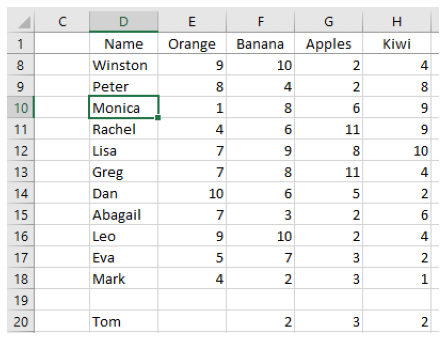

In [ ]:
# remove rows 
img = mpimg.imread('images/img_25.PNG')
plt.imshow(img)
plt.axis('off')
plt.show()

In [114]:
# delete cols

ws.delete_cols(idx=1, amount=1)
wb.save('Groceries_1.xlsx') 

# see what was written

for idx, row in enumerate(ws['A1:F5']):
   print(idx+1, [x.value for x in row])

1 ['Name', 'Orange', 'Banana', 'Apples', 'Kiwi', None]
2 ['Rob', 12, 2, 3, 2, None]
3 ['Alex', 7, 8, 11, 4, None]
4 ['Sean', 11, 10, 3, 7, None]
5 ['Marina', 1, 1, 5, 10, None]


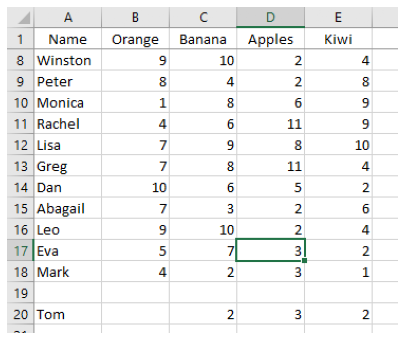

In [ ]:
# removed column
img = mpimg.imread('images/img_26.PNG')
plt.imshow(img)
plt.axis('off')
plt.show()

In [115]:
# reminder of ws dimensions
print(ws.max_row)
print(ws.max_column)


25
6


In [116]:
for idx, row in enumerate(ws['A1:E25']):
   print(idx+1, [x.value for x in row])

1 ['Name', 'Orange', 'Banana', 'Apples', 'Kiwi']
2 ['Rob', 12, 2, 3, 2]
3 ['Alex', 7, 8, 11, 4]
4 ['Sean', 11, 10, 3, 7]
5 ['Marina', 1, 1, 5, 10]
6 ['Jess', 10, 6, 5, 2]
7 ['Nicolas', 7, 3, 2, 6]
8 ['Winston', 9, 10, 2, 4]
9 ['Peter', 8, 4, 2, 8]
10 ['Monica', 1, 8, 6, 9]
11 ['Rachel', 4, 6, 11, 9]
12 ['Lisa', 7, 9, 8, 10]
13 ['Greg', 7, 8, 11, 4]
14 ['Dan', 10, 6, 5, 2]
15 ['Abagail', 7, 3, 2, 6]
16 ['Leo', 9, 10, 2, 4]
17 ['Eva', 5, 7, 3, 2]
18 ['Mark', 4, 2, 3, 1]
19 [None, None, None, None, None]
20 ['Tom', None, 2, 3, 2]
21 [None, None, None, None, None]
22 [None, None, None, None, None]
23 [None, None, None, None, None]
24 [None, None, None, None, None]
25 [None, None, None, None, None]


# 6&nbsp; Identify locations 

In [117]:
# find the column letter from index
get_column_letter(129)

'DY'

In [118]:
# find column index from letter
column_index_from_string('BMY')

1715

## Accurate max rows, max columns

In [119]:
# reminder of ws dimensions
print(ws.max_row)
print(ws.max_column)


25
6


In [120]:
# reminder of excel

for id, row in enumerate(ws['A1:E25']):
    print (id +1 , [x.value for x in row])

1 ['Name', 'Orange', 'Banana', 'Apples', 'Kiwi']
2 ['Rob', 12, 2, 3, 2]
3 ['Alex', 7, 8, 11, 4]
4 ['Sean', 11, 10, 3, 7]
5 ['Marina', 1, 1, 5, 10]
6 ['Jess', 10, 6, 5, 2]
7 ['Nicolas', 7, 3, 2, 6]
8 ['Winston', 9, 10, 2, 4]
9 ['Peter', 8, 4, 2, 8]
10 ['Monica', 1, 8, 6, 9]
11 ['Rachel', 4, 6, 11, 9]
12 ['Lisa', 7, 9, 8, 10]
13 ['Greg', 7, 8, 11, 4]
14 ['Dan', 10, 6, 5, 2]
15 ['Abagail', 7, 3, 2, 6]
16 ['Leo', 9, 10, 2, 4]
17 ['Eva', 5, 7, 3, 2]
18 ['Mark', 4, 2, 3, 1]
19 [None, None, None, None, None]
20 ['Tom', None, 2, 3, 2]
21 [None, None, None, None, None]
22 [None, None, None, None, None]
23 [None, None, None, None, None]
24 [None, None, None, None, None]
25 [None, None, None, None, None]


### Max Rows accurate

In [121]:
# append a new row William (when appen it will go at the end of the rows)
cellrange = [('William', 8, 2, 3, 2)]

# looping through newdata to access its each item 
for item in cellrange:
     ws.append(item)

# don't forget to save the modifications
# and have the excel closed
wb.save('Groceries_1.xlsx')


In [122]:
# reminder of ws dimensions
print(ws.max_row)
print(ws.max_column)

26
6


In [123]:
# William row was added at the end of ws (row 26), after blank (None rows from 21 and 25)

for id, row in enumerate(ws['A1:E26']):
    print (id +1 , [x.value for x in row])

1 ['Name', 'Orange', 'Banana', 'Apples', 'Kiwi']
2 ['Rob', 12, 2, 3, 2]
3 ['Alex', 7, 8, 11, 4]
4 ['Sean', 11, 10, 3, 7]
5 ['Marina', 1, 1, 5, 10]
6 ['Jess', 10, 6, 5, 2]
7 ['Nicolas', 7, 3, 2, 6]
8 ['Winston', 9, 10, 2, 4]
9 ['Peter', 8, 4, 2, 8]
10 ['Monica', 1, 8, 6, 9]
11 ['Rachel', 4, 6, 11, 9]
12 ['Lisa', 7, 9, 8, 10]
13 ['Greg', 7, 8, 11, 4]
14 ['Dan', 10, 6, 5, 2]
15 ['Abagail', 7, 3, 2, 6]
16 ['Leo', 9, 10, 2, 4]
17 ['Eva', 5, 7, 3, 2]
18 ['Mark', 4, 2, 3, 1]
19 [None, None, None, None, None]
20 ['Tom', None, 2, 3, 2]
21 [None, None, None, None, None]
22 [None, None, None, None, None]
23 [None, None, None, None, None]
24 [None, None, None, None, None]
25 [None, None, None, None, None]
26 ['William', 8, 2, 3, 2]


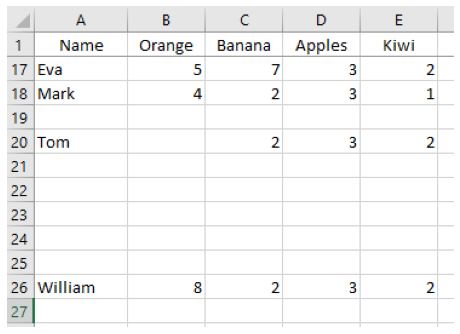

In [ ]:
# William at row 26
img = mpimg.imread('images/img_27.PNG')
plt.imshow(img)
plt.axis('off')
plt.show()

In [124]:
# initially we had 11 rows
# but we did some itirations, modifications / add/ delete data
# that will impact the dimantions of our worksheet

print('we get the wrong number of rows that are not blank...')
print('we should have gotten 20 NON BLANK rows...but with BLANK included got...') 

# run again max_row() function to get nb of rows of excel dataframe     
ws.max_row

we get the wrong number of rows that are not blank...
we should have gotten 20 NON BLANK rows...but with BLANK included got...


26

In [125]:
# Let's resume our dimensions

print('our ws starts at row nb: ', 1 )
print('nb of rows with blanks: ', ws.max_row )
print('')
print('nb of cols with blanks: ', ws.max_column)
print('ws starts at column', 1, ': ', get_column_letter(1))
print('ws ends at column', ws.max_column,': ',  get_column_letter(ws.max_column))

our ws starts at row nb:  1
nb of rows with blanks:  26

nb of cols with blanks:  6
ws starts at column 1 :  A
ws ends at column 6 :  F


In [126]:
# based on this dimensions, let's compute the range of the df in excel (ws): in fomrat 'A1:F26'
df_range= 'A1:' + str(get_column_letter(ws.max_column)) + str(ws.max_row)
print(df_range)

A1:F26


In [127]:
# so if we pass df_range in ws range, it will automatically itirate through the whole ws

for id, row in enumerate(ws[df_range]):
    print (id +1 , [x.value for x in row])

1 ['Name', 'Orange', 'Banana', 'Apples', 'Kiwi', None]
2 ['Rob', 12, 2, 3, 2, None]
3 ['Alex', 7, 8, 11, 4, None]
4 ['Sean', 11, 10, 3, 7, None]
5 ['Marina', 1, 1, 5, 10, None]
6 ['Jess', 10, 6, 5, 2, None]
7 ['Nicolas', 7, 3, 2, 6, None]
8 ['Winston', 9, 10, 2, 4, None]
9 ['Peter', 8, 4, 2, 8, None]
10 ['Monica', 1, 8, 6, 9, None]
11 ['Rachel', 4, 6, 11, 9, None]
12 ['Lisa', 7, 9, 8, 10, None]
13 ['Greg', 7, 8, 11, 4, None]
14 ['Dan', 10, 6, 5, 2, None]
15 ['Abagail', 7, 3, 2, 6, None]
16 ['Leo', 9, 10, 2, 4, None]
17 ['Eva', 5, 7, 3, 2, None]
18 ['Mark', 4, 2, 3, 1, None]
19 [None, None, None, None, None, None]
20 ['Tom', None, 2, 3, 2, None]
21 [None, None, None, None, None, None]
22 [None, None, None, None, None, None]
23 [None, None, None, None, None, None]
24 [None, None, None, None, None, None]
25 [None, None, None, None, None, None]
26 ['William', 8, 2, 3, 2, None]


Sometimes if the worksheet was manipulated, some columns or rows are added even if there cells are empty.






In [128]:
# compare function
print('openpyxl max_row: ', ws.max_row)

openpyxl max_row:  26


In [129]:
# iterate till the row 28 (extend the range of iteration + 2)
for id, row in enumerate(ws['A18:F28']):
    print (id +20 , [x.value for x in row])

20 ['Mark', 4, 2, 3, 1, None]
21 [None, None, None, None, None, None]
22 ['Tom', None, 2, 3, 2, None]
23 [None, None, None, None, None, None]
24 [None, None, None, None, None, None]
25 [None, None, None, None, None, None]
26 [None, None, None, None, None, None]
27 [None, None, None, None, None, None]
28 ['William', 8, 2, 3, 2, None]
29 [None, None, None, None, None, None]
30 [None, None, None, None, None, None]


In [130]:
# run again ws.max_row, as we iterateted farther (+2) the the actual shape of 25 rows, this function has add + 2
print('openpyxl max_row: ', ws.max_row)

openpyxl max_row:  28


==> To evercome this we'll write functions to compute max rows and max col for our needs




In [131]:
# write a function that will compute the accurate nb of rows by omitting blanks
def get_maximum_rows_blank(*, sheet_object):
    rows = 0
    for max_row, row in enumerate(sheet_object, 1):
        if  not all(col.value is None for col in row):
            rows += 1
        
    return rows

# call the new function
get_maximum_rows_blank(sheet_object = ws) 

20

In [132]:
# this function will stop at first blank ()
for id, row in enumerate(ws):
    print (id +1 , [x.value for x in row])

1 ['Name', 'Orange', 'Banana', 'Apples', 'Kiwi', None]
2 ['Rob', 12, 2, 3, 2, None]
3 ['Alex', 7, 8, 11, 4, None]
4 ['Sean', 11, 10, 3, 7, None]
5 ['Marina', 1, 1, 5, 10, None]
6 ['Jess', 10, 6, 5, 2, None]
7 ['Nicolas', 7, 3, 2, 6, None]
8 ['Winston', 9, 10, 2, 4, None]
9 ['Peter', 8, 4, 2, 8, None]
10 ['Monica', 1, 8, 6, 9, None]
11 ['Rachel', 4, 6, 11, 9, None]
12 ['Lisa', 7, 9, 8, 10, None]
13 ['Greg', 7, 8, 11, 4, None]
14 ['Dan', 10, 6, 5, 2, None]
15 ['Abagail', 7, 3, 2, 6, None]
16 ['Leo', 9, 10, 2, 4, None]
17 ['Eva', 5, 7, 3, 2, None]
18 ['Mark', 4, 2, 3, 1, None]
19 [None, None, None, None, None, None]
20 ['Tom', None, 2, 3, 2, None]
21 [None, None, None, None, None, None]
22 [None, None, None, None, None, None]
23 [None, None, None, None, None, None]
24 [None, None, None, None, None, None]
25 [None, None, None, None, None, None]
26 ['William', 8, 2, 3, 2, None]
27 [None, None, None, None, None, None]
28 [None, None, None, None, None, None]


In [133]:
# write a function that will compute the accurate nb of rows including the blanks, up to the last non blanks
def get_maximum_rows(*, sheet_object):
    df_range= 'A1:' + str(get_column_letter(sheet_object.max_column)) + str(sheet_object.max_row)
    rows = 0
    for idx, row in enumerate(sheet_object[df_range]): # values_only=True meanse we want to access the values
        if not all(col.value is None for col in row):
            rows += 1
            last_row = idx+1
    return last_row

get_maximum_rows(sheet_object = ws) 

26

In [134]:
# the row 26 is the last non blank row

for id, row in enumerate (ws):
  print(id+1, [x.value for x in row])

1 ['Name', 'Orange', 'Banana', 'Apples', 'Kiwi', None]
2 ['Rob', 12, 2, 3, 2, None]
3 ['Alex', 7, 8, 11, 4, None]
4 ['Sean', 11, 10, 3, 7, None]
5 ['Marina', 1, 1, 5, 10, None]
6 ['Jess', 10, 6, 5, 2, None]
7 ['Nicolas', 7, 3, 2, 6, None]
8 ['Winston', 9, 10, 2, 4, None]
9 ['Peter', 8, 4, 2, 8, None]
10 ['Monica', 1, 8, 6, 9, None]
11 ['Rachel', 4, 6, 11, 9, None]
12 ['Lisa', 7, 9, 8, 10, None]
13 ['Greg', 7, 8, 11, 4, None]
14 ['Dan', 10, 6, 5, 2, None]
15 ['Abagail', 7, 3, 2, 6, None]
16 ['Leo', 9, 10, 2, 4, None]
17 ['Eva', 5, 7, 3, 2, None]
18 ['Mark', 4, 2, 3, 1, None]
19 [None, None, None, None, None, None]
20 ['Tom', None, 2, 3, 2, None]
21 [None, None, None, None, None, None]
22 [None, None, None, None, None, None]
23 [None, None, None, None, None, None]
24 [None, None, None, None, None, None]
25 [None, None, None, None, None, None]
26 ['William', 8, 2, 3, 2, None]
27 [None, None, None, None, None, None]
28 [None, None, None, None, None, None]


In [135]:
# Let's compare  functions

# with max_row function from package
print('with openpyxl function max_row: ', ws.max_row)

# with function get_maximum_rows
print('last non blank row', get_maximum_rows(sheet_object = ws)) 

# with function get_maximum_rows_blank, only non blank rows
print('up to the 1st blank ',get_maximum_rows_blank(sheet_object = ws))


with openpyxl function max_row:  28
last non blank row 26
up to the 1st blank  20


### Max Columns accurate

In [ ]:
# let´s iterate by extending the columns range (G instead of E)

# for id, eow in enumerate (ws['A1:G5']):
#  print(id + 1 )

In [136]:
print('we get the wrong number of columns that are not blank...')
print('we should have gotten 5...but got...')   

ws.max_column

we get the wrong number of columns that are not blank...
we should have gotten 5...but got...


6

In [137]:
# nb of columns of excel dataframe with blank cells
ws.max_column

6

In [138]:
# write a function that will ompute the accurate nb of rows

def get_maximum_cols(sheet):
    for i in range(2, 20000):
        if sheet.cell(row=1, column= i).value == None:
            max_col = i
            break
    return max_col-1

In [139]:
# it will count non blanks columns
get_maximum_cols(sheet=ws)  #review function to get the framing of non blank columns  

5

# 7&nbsp;Computation (Formulas or pandas)

## Use Formulas with openpyxl

In [140]:
# we want to sum the "Alex" row with the data: Alex	7,8,11,4
# that would give us 30


ws['F2']= '=SUM(B2:E2)'
print(ws['F2'].value)
wb.save('Groceries_1.xlsx') # check if excel in other language average in engl and moyenne in fr

=SUM(B2:E2)


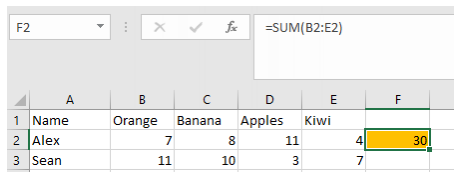

In [ ]:
# the cell with the formula
img = mpimg.imread('images/img_28.PNG')
plt.imshow(img)
plt.axis('off')
plt.show()

Keep in mind that when using formulas with openpyxl package, in the excel you would see the numerical result value.

But in reality, the value of the cell will be the text of the written formula

****** That's why I recommend using opepyxl formulas only if there are no further manipulation of the excel

****** Otherwise I recomment tu use pandas to do calculations, that will be explained later...

In [141]:
# remove the cell we just wrote

ws.cell(row=2, column=6).value = None
wb.save('Groceries_1.xlsx')

**Column Totals** 

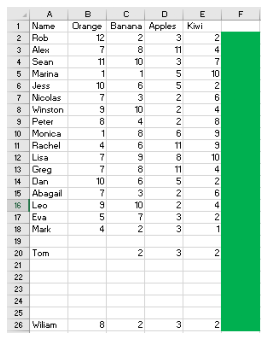

In [ ]:
# we would like to add totals in the column F ( excel range F1:F20)
img = mpimg.imread('images/img_29.PNG')
plt.imshow(img)
plt.axis('off')
plt.show()

In [142]:
# column totals

# identify the range location where to write the result of column
first_row = 2

# locate the last row
last_row = get_maximum_rows(sheet_object = ws) # 20
print(last_row)

# locate the last column
end_col = get_maximum_cols(sheet=ws) # ==> 5
print(end_col)

# locate the column where to comute the total
sum_col = end_col + 1 # ==> 6

# from what column to compute the totals
start_col = 2

# iterate row by row, by giving the parameters of the range F1:F20
for row in ws.iter_rows(min_row = 2, # from row 2
                        max_row = last_row, # till row 20
                        min_col =  sum_col, # in column 6
                        max_col = sum_col): # in column 6
    
    # iterate through cell in each row
    # assign values by applying the formula
    for cell in row:
        # identify /write the range of the cell to sum up
        # cellrange referance
        
        # concatenate strings to get the cell reference that is in iteration
        # begining of the range 
        cell_sum_start = str(get_column_letter(start_col)) + str(first_row) # cell ref 'B2'
        # end of the range
        cell_col_end = str(get_column_letter(end_col)) + str(first_row) # cell ref 'E2'
        # sum up 
        # will write the formula in Excel style      
        cell.value = '=SUM({0}:{1})'.format(cell_sum_start, cell_col_end)  # '=SUM(B2:E2)'
        # increment the row number for the next iteration
        first_row= first_row+1

wb.save('Groceries_1.xlsx')

26
5


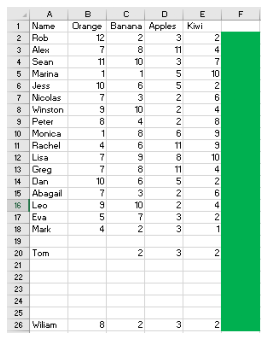

In [ ]:
# 1st part of iteration (green range)
img = mpimg.imread('images/img_29.PNG')
plt.imshow(img)
plt.axis('off')
plt.show()

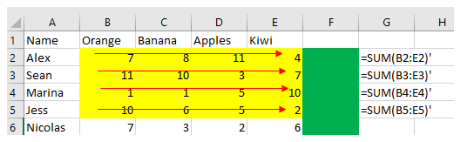

In [ ]:
# 2nd part of iteration, iteration row by row, and cell by cell in each row
img = mpimg.imread('images/img_30.PNG')
plt.imshow(img)
plt.axis('off')
plt.show()

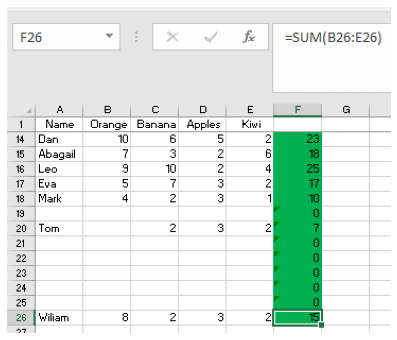

In [ ]:
# 3rd part of iteration 
img = mpimg.imread('images/img_31.PNG')
plt.imshow(img)
plt.axis('off')
plt.show()

In [143]:
first_row = 2
str(first_row)

'2'

In [144]:
str(get_column_letter(start_col)) + str(first_row)

'B2'

In [145]:
get_column_letter(end_col)

'E'

In [146]:
str(get_column_letter(end_col)) + str(first_row)

'E2'

In [147]:
'=SUM({0}:{1})'.format(cell_sum_start, cell_col_end) 

'=SUM(B26:E26)'

In [148]:
# when using formumas, the output will be the syntax of the formula, nut in excel we will see the numerical values
for id, row in enumerate(ws["A1:F26"]):
  print(id+1, [x.value for x in row])

1 ['Name', 'Orange', 'Banana', 'Apples', 'Kiwi', None]
2 ['Rob', 12, 2, 3, 2, '=SUM(B2:E2)']
3 ['Alex', 7, 8, 11, 4, '=SUM(B3:E3)']
4 ['Sean', 11, 10, 3, 7, '=SUM(B4:E4)']
5 ['Marina', 1, 1, 5, 10, '=SUM(B5:E5)']
6 ['Jess', 10, 6, 5, 2, '=SUM(B6:E6)']
7 ['Nicolas', 7, 3, 2, 6, '=SUM(B7:E7)']
8 ['Winston', 9, 10, 2, 4, '=SUM(B8:E8)']
9 ['Peter', 8, 4, 2, 8, '=SUM(B9:E9)']
10 ['Monica', 1, 8, 6, 9, '=SUM(B10:E10)']
11 ['Rachel', 4, 6, 11, 9, '=SUM(B11:E11)']
12 ['Lisa', 7, 9, 8, 10, '=SUM(B12:E12)']
13 ['Greg', 7, 8, 11, 4, '=SUM(B13:E13)']
14 ['Dan', 10, 6, 5, 2, '=SUM(B14:E14)']
15 ['Abagail', 7, 3, 2, 6, '=SUM(B15:E15)']
16 ['Leo', 9, 10, 2, 4, '=SUM(B16:E16)']
17 ['Eva', 5, 7, 3, 2, '=SUM(B17:E17)']
18 ['Mark', 4, 2, 3, 1, '=SUM(B18:E18)']
19 [None, None, None, None, None, '=SUM(B19:E19)']
20 ['Tom', None, 2, 3, 2, '=SUM(B20:E20)']
21 [None, None, None, None, None, '=SUM(B21:E21)']
22 [None, None, None, None, None, '=SUM(B22:E22)']
23 [None, None, None, None, None, '=SUM(B23:E23)']
2

In [149]:
# compute automatically cell location where to write "Total" header for columns and rows

# for columns
headers_row = 1 # as the column headers are on the 1st row
col_location= str(get_column_letter(sum_col)) + str(headers_row)
print(col_location)

F1


In [150]:
# for rows
rows_total_row = last_row + 1 # we'll get 27
row_location= str(get_column_letter(start_col -1 )) + str(rows_total_row)
print(row_location)

A27


In [151]:
# write 'Total' at the indicated location

# for columns
ws[col_location]='Column Total'

# for rows
ws[row_location]='Row Total'

# save into another excel file
wb.save('Groceries_1.xlsx')

In [152]:
get_maximum_cols(sheet=ws)

6

In [153]:
# now compute and write the result of row totals

# identify where to write the result of row total
first_row = 2
sum_row = get_maximum_rows(sheet_object = ws)  #27
start_col = 2
end_col = get_maximum_cols(sheet=ws) # 6

for row in ws.iter_rows(min_row=sum_row, #27
                        max_row=sum_row,  #27
                        min_col=start_col, # 2 or B
                        max_col=end_col): # 6 or F
    for cell in row:
        # identify /write the range of the cell to sum up
        cell_sum_start = cell.column_letter + str(first_row) # from B2
        cell_sum_end = cell.column_letter + str(sum_row -1) # to B21
        cell.value = '=SUM({0}:{1})'.format(cell_sum_start, cell_sum_end) # =SUM(B2:B21)
        

wb.save('Groceries_1.xlsx')

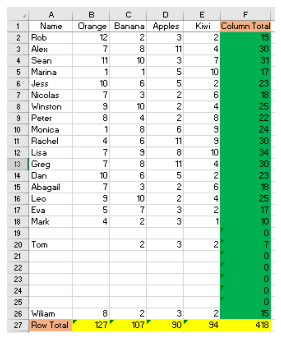

In [ ]:
# addin totals
img = mpimg.imread('images/img_32.PNG')
plt.imshow(img)
plt.axis('off')
plt.show()

In [154]:
# Get value of the cell containing the formula.
for row in ws["A1:F27"]:
    print ([x.value for x in row])

['Name', 'Orange', 'Banana', 'Apples', 'Kiwi', 'Column Total']
['Rob', 12, 2, 3, 2, '=SUM(B2:E2)']
['Alex', 7, 8, 11, 4, '=SUM(B3:E3)']
['Sean', 11, 10, 3, 7, '=SUM(B4:E4)']
['Marina', 1, 1, 5, 10, '=SUM(B5:E5)']
['Jess', 10, 6, 5, 2, '=SUM(B6:E6)']
['Nicolas', 7, 3, 2, 6, '=SUM(B7:E7)']
['Winston', 9, 10, 2, 4, '=SUM(B8:E8)']
['Peter', 8, 4, 2, 8, '=SUM(B9:E9)']
['Monica', 1, 8, 6, 9, '=SUM(B10:E10)']
['Rachel', 4, 6, 11, 9, '=SUM(B11:E11)']
['Lisa', 7, 9, 8, 10, '=SUM(B12:E12)']
['Greg', 7, 8, 11, 4, '=SUM(B13:E13)']
['Dan', 10, 6, 5, 2, '=SUM(B14:E14)']
['Abagail', 7, 3, 2, 6, '=SUM(B15:E15)']
['Leo', 9, 10, 2, 4, '=SUM(B16:E16)']
['Eva', 5, 7, 3, 2, '=SUM(B17:E17)']
['Mark', 4, 2, 3, 1, '=SUM(B18:E18)']
[None, None, None, None, None, '=SUM(B19:E19)']
['Tom', None, 2, 3, 2, '=SUM(B20:E20)']
[None, None, None, None, None, '=SUM(B21:E21)']
[None, None, None, None, None, '=SUM(B22:E22)']
[None, None, None, None, None, '=SUM(B23:E23)']
[None, None, None, None, None, '=SUM(B24:E24)']
[No

## Computation in DF with pandas

In [166]:
# Convert Sheet to DataFrame 
df = pd.DataFrame(ws.values)
print(df.shape)
df.head(5) # note that there are no headers

(28, 7)


,0,1,2,3,4,5,6
0,Name,Orange,Banana,Apples,Kiwi,Column Total,None
1,Rob,12,2,3,2,=SUM(B2:E2),None
2,Alex,7,8,11,4,=SUM(B3:E3),None
3,Sean,11,10,3,7,=SUM(B4:E4),None
4,Marina,1,1,5,10,=SUM(B5:E5),None


In [167]:
df.tail(4)

,0,1,2,3,4,5,6
24,None,None,None,None,None,=SUM(B25:E25),None
25,William,8,2,3,2,=SUM(B26:E26),None
26,Row Total,=SUM(B2:B26),=SUM(C2:C26),=SUM(D2:D26),=SUM(E2:E26),=SUM(F2:F26),None
27,None,None,None,None,None,None,None


In [168]:
# move the 1st row (index=0) to headers

print(df.shape)
headers = df.iloc[0,:] # copy the row with index 0 and assign it as headers
df.columns = headers # indicate 
df = df.loc[1:] # now the df will start at the row with index 1

df.head() # the index start at 1 because of the shift df.loc[1:]

(28, 7)


,Name,Orange,Banana,Apples,Kiwi,Column Total,NaN
1,Rob,12,2,3,2,=SUM(B2:E2),None
2,Alex,7,8,11,4,=SUM(B3:E3),None
3,Sean,11,10,3,7,=SUM(B4:E4),None
4,Marina,1,1,5,10,=SUM(B5:E5),None
5,Jess,10,6,5,2,=SUM(B6:E6),None


In [169]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27 entries, 1 to 27
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Name          20 non-null     object
 1   Orange        19 non-null     object
 2   Banana        20 non-null     object
 3   Apples        20 non-null     object
 4   Kiwi          20 non-null     object
 5   Column Total  26 non-null     object
 6   None          0 non-null      object
dtypes: object(7)
memory usage: 1.6+ KB


In [170]:
df.tail(4)

,Name,Orange,Banana,Apples,Kiwi,Column Total,NaN
24,None,None,None,None,None,=SUM(B25:E25),None
25,William,8,2,3,2,=SUM(B26:E26),None
26,Row Total,=SUM(B2:B26),=SUM(C2:C26),=SUM(D2:D26),=SUM(E2:E26),=SUM(F2:F26),None
27,None,None,None,None,None,None,None


In [171]:
# reset index
df.reset_index(inplace = True, drop = True) # to start at 0 

print(df.shape)
df.head(2)

(27, 7)


,Name,Orange,Banana,Apples,Kiwi,Column Total,NaN
0,Rob,12,2,3,2,=SUM(B2:E2),None
1,Alex,7,8,11,4,=SUM(B3:E3),None


In [172]:
df.tail(4)

,Name,Orange,Banana,Apples,Kiwi,Column Total,NaN
23,None,None,None,None,None,=SUM(B25:E25),None
24,William,8,2,3,2,=SUM(B26:E26),None
25,Row Total,=SUM(B2:B26),=SUM(C2:C26),=SUM(D2:D26),=SUM(E2:E26),=SUM(F2:F26),None
26,None,None,None,None,None,None,None


In [173]:
df.shape

(27, 7)

In [174]:
# drop None values

# rows => axis=0
df.dropna(how='all', axis=0, inplace=True) # # drop all None values from rows

# columns => axis =1
df.dropna(how='all', axis=1, inplace=True) # drop all None values from columns


print(df.shape)
df.head()

(26, 6)


,Name,Orange,Banana,Apples,Kiwi,Column Total
0,Rob,12,2,3,2,=SUM(B2:E2)
1,Alex,7,8,11,4,=SUM(B3:E3)
2,Sean,11,10,3,7,=SUM(B4:E4)
3,Marina,1,1,5,10,=SUM(B5:E5)
4,Jess,10,6,5,2,=SUM(B6:E6)


In [175]:
df.tail(4)

,Name,Orange,Banana,Apples,Kiwi,Column Total
22,None,None,None,None,None,=SUM(B24:E24)
23,None,None,None,None,None,=SUM(B25:E25)
24,William,8,2,3,2,=SUM(B26:E26)
25,Row Total,=SUM(B2:B26),=SUM(C2:C26),=SUM(D2:D26),=SUM(E2:E26),=SUM(F2:F26)


In [176]:
# compute Total Column

# select columns to sum with iloc

## : from the iloc means that we're selecting all
##  from column Orange with index 1 to column Kiwi with index=5

# add a new column 'Total' in the dataframe with the computation of the sum of columns [1:5]
df['Column Total'] = df.iloc[:, 1:5].sum(axis=1)
print(df.shape)
df.head()

(26, 6)


,Name,Orange,Banana,Apples,Kiwi,Column Total
0,Rob,12,2,3,2,19
1,Alex,7,8,11,4,30
2,Sean,11,10,3,7,31
3,Marina,1,1,5,10,17
4,Jess,10,6,5,2,23


In [177]:
df.tail(4)

,Name,Orange,Banana,Apples,Kiwi,Column Total
22,None,None,None,None,None,0
23,None,None,None,None,None,0
24,William,8,2,3,2,15
25,Row Total,=SUM(B2:B26),=SUM(C2:C26),=SUM(D2:D26),=SUM(E2:E26),=SUM(B2:B26)=SUM(C2:C26)=SUM(D2:D26)=SUM(E2:E26)


In [178]:
# compute row Total

# select the range [25,1:6] with iloc where we want to write the result..
## 20 meaning the row index in df...
## (but in excel this row index will be 21)

# df.iloc[:25,1:6].sum(axis=0) ==> calcultate the sum of the range  [:20,1:6]
# :18 meaning everithyn till 25 included
df.iloc[25,1:6] = df.iloc[:25,1:6].sum(axis=0) # axis 0 meaning column axis

print(df.tail(6))

print('')
print('with pandas calculation youget only the values of the operations output, and not formulas')

0        Name Orange Banana Apples  Kiwi Column Total
20       None   None   None   None  None            0
21       None   None   None   None  None            0
22       None   None   None   None  None            0
23       None   None   None   None  None            0
24    William      8      2      3     2           15
25  Row Total    127    107     90    94          418

with pandas calculation youget only the values of the operations output, and not formulas


In [179]:
df.shape

(26, 6)

In [180]:
# Let's get rid of rows where the Name column is None

df = df.dropna(axis=0, subset=['Name'])
print(df.shape)
df.tail(5)

(20, 6)


,Name,Orange,Banana,Apples,Kiwi,Column Total
15,Eva,5,7,3,2,17
16,Mark,4,2,3,1,10
18,Tom,None,2,3,2,7
24,William,8,2,3,2,15
25,Row Total,127,107,90,94,418


In [181]:
# save this df as an excel in to see the difference with Groceries_1
df.to_excel("Groceries_2_pandas.xlsx",
             sheet_name='pandas') 

In [182]:
os.listdir()

['images',
 'Groceries.xlsx',
 'Excel_processing_Basics_Colab_Module_3_backup.ipynb',
 'Groceries_1.xlsx',
 'Groceries_2_pandas.xlsx']

# 8&nbsp;Formating

## *Cell location/notation with xlswritter*

### xl_range() function

In [185]:
# now if we iterate in our df modifiefd with pandas
# the 1st row are the headers 
# and the shape of df
print(df.shape)
print('')

for idx, row in enumerate(df.values):
  print(idx, [x for x in row])

(20, 6)

0 ['Rob', 12, 2, 3, 2, 19]
1 ['Alex', 7, 8, 11, 4, 30]
2 ['Sean', 11, 10, 3, 7, 31]
3 ['Marina', 1, 1, 5, 10, 17]
4 ['Jess', 10, 6, 5, 2, 23]
5 ['Nicolas', 7, 3, 2, 6, 18]
6 ['Winston', 9, 10, 2, 4, 25]
7 ['Peter', 8, 4, 2, 8, 22]
8 ['Monica', 1, 8, 6, 9, 24]
9 ['Rachel', 4, 6, 11, 9, 30]
10 ['Lisa', 7, 9, 8, 10, 34]
11 ['Greg', 7, 8, 11, 4, 30]
12 ['Dan', 10, 6, 5, 2, 23]
13 ['Abagail', 7, 3, 2, 6, 18]
14 ['Leo', 9, 10, 2, 4, 25]
15 ['Eva', 5, 7, 3, 2, 17]
16 ['Mark', 4, 2, 3, 1, 10]
17 ['Tom', None, 2, 3, 2, 7]
18 ['William', 8, 2, 3, 2, 15]
19 ['Row Total', 127, 107, 90, 94, 418]


In [212]:
# Convert zero indexed row and column cell references to a A1:B1 range string

xl_range(# upper corner on the right
         first_row = 0, # as is zero indexed, in excel indexation is going to +1, so 1
         first_col = 0, # in excel will be the column 1 with letter A
         # buttom corner on the left
         # the limits will add + 1 in excel
         last_row = 20, # in excel will be the row 21
         last_col= 5) # in excel will be the column 6 ith letter F

'A1:F21'

In [213]:
# we obtained the excel range of our df
img = mpimg.imread('images/img_33.PNG')
plt.imshow(img)
plt.axis('off')
plt.show()

FileNotFoundError: ignored

In [214]:
print(xl_range(0, 0, 9, 0))  # A1:A10
print(xl_range(1, 2, 8, 5)) # C2:F9
print(xl_range(0, 0, 20, 5))  # A1:F21
print(xl_range(0, 0, 0, 0))  # A1
# index = first row, first columns, end row, end column
# so you'll need to add + 1 everywhere to get the excel references

A1:A10
C2:F9
A1:F21
A1


In [189]:
# as we droped rows where Name was None
# the indexation of rows didn't adapt
df.tail(8)

,Name,Orange,Banana,Apples,Kiwi,Column Total
12,Dan,10,6,5,2,23
13,Abagail,7,3,2,6,18
14,Leo,9,10,2,4,25
15,Eva,5,7,3,2,17
16,Mark,4,2,3,1,10
18,Tom,None,2,3,2,7
24,William,8,2,3,2,15
25,Row Total,127,107,90,94,418


In [190]:
# so we need to reset the index to have an order sequence for rows indics

df.reset_index(inplace = True, drop = True) # to start at 0 
df.tail(5)

,Name,Orange,Banana,Apples,Kiwi,Column Total
15,Eva,5,7,3,2,17
16,Mark,4,2,3,1,10
17,Tom,None,2,3,2,7
18,William,8,2,3,2,15
19,Row Total,127,107,90,94,418


In [191]:
# compute the range of the whole dataframe 

print('df dimensions: ', df.shape)

max_row, max_col = df.shape # we'll get the lengh of df as maw_rows, and nb of col as max_col
print('rows: ', max_row)
print('columns: ', max_col)

df dimensions:  (20, 6)
rows:  20
columns:  6


In [215]:
max_row, max_col = df.shape # we'll get the lengh of df as maw_rows, and nb of col as max_col

# compute the cellrange of the df in the excel without doing it manually
# don't forget that xl_range always add + 1 !!!

df_range = xl_range(
                   # upper left corner
                    0, # in excel row 1
                    0, # in excel column 1
    
                    # bottom right corner
         
                    # row of the corner
                    last_row = max_row, # 20, but in excel row nb 21, 
                                # but it's ok, 
                                # because the headers will be considered as a row in excel
                    
                    # col of the corner
                    # becaus it's starting at index 0, we need to substract -1
                    last_col= max_col - 1 ) # 6 - 1 = 5, but in excel col nr 6
print(df_range)

A1:F21


In [216]:
# in excel we got till the row 21
img = mpimg.imread('images/img_33.PNG')
plt.imshow(img)
plt.axis('off')
plt.show()

FileNotFoundError: ignored

In [194]:
# the whole df with the headers
df.head(20)

,Name,Orange,Banana,Apples,Kiwi,Column Total
0,Rob,12,2,3,2,19
1,Alex,7,8,11,4,30
2,Sean,11,10,3,7,31
3,Marina,1,1,5,10,17
4,Jess,10,6,5,2,23
5,Nicolas,7,3,2,6,18
6,Winston,9,10,2,4,25
7,Peter,8,4,2,8,22
8,Monica,1,8,6,9,24
9,Rachel,4,6,11,9,30


In [195]:
# the whole df without headers
for idx, row in enumerate(df.values):
  print(idx, [x for x in row])

0 ['Rob', 12, 2, 3, 2, 19]
1 ['Alex', 7, 8, 11, 4, 30]
2 ['Sean', 11, 10, 3, 7, 31]
3 ['Marina', 1, 1, 5, 10, 17]
4 ['Jess', 10, 6, 5, 2, 23]
5 ['Nicolas', 7, 3, 2, 6, 18]
6 ['Winston', 9, 10, 2, 4, 25]
7 ['Peter', 8, 4, 2, 8, 22]
8 ['Monica', 1, 8, 6, 9, 24]
9 ['Rachel', 4, 6, 11, 9, 30]
10 ['Lisa', 7, 9, 8, 10, 34]
11 ['Greg', 7, 8, 11, 4, 30]
12 ['Dan', 10, 6, 5, 2, 23]
13 ['Abagail', 7, 3, 2, 6, 18]
14 ['Leo', 9, 10, 2, 4, 25]
15 ['Eva', 5, 7, 3, 2, 17]
16 ['Mark', 4, 2, 3, 1, 10]
17 ['Tom', None, 2, 3, 2, 7]
18 ['William', 8, 2, 3, 2, 15]
19 ['Row Total', 127, 107, 90, 94, 418]


### xl_rowcol_to_cell() coordinates of a cell

In [217]:
# function converts a zero indexed row and column cell values to an A1 style string
#it helps to get automatically a the coordinates of a cell

xl_rowcol_to_cell(0,0) # as is zero indexed, in excel indexation is going to be row 1, col 1 (A)

'A1'

### xl_col_to_name()

In [218]:
# Convert a zero indexed column cell reference to a string
xl_col_to_name(50)

'AY'

In [219]:
# LOCATE UPPER CORNER on the LEFT in excel

# start indices of the df
start = xl_rowcol_to_cell(0,0) # the coordinates of the upper corner, where df begins 
start_col = xl_col_to_name(0) # column letter where df begins 
start_row = 0  # the row where df begins

print('the coordinates where the df begins...')
print("starting point:", start, 
      "starts at row:", start_row,      
      "starts at col:", start_col)

the coordinates where the df begins...
starting point: A1 starts at row: 0 starts at col: A


In [220]:
# LOCATE BOTTOM CORNER on the RIGHT in excel
# end indices of df
end_point = xl_rowcol_to_cell(max_row, max_col-1) # check why max_row not -1, but max_col -1
end_col = xl_col_to_name(max_col-1)
end_row = max_row + 1

print('the coordinates where the df ends...')
print("end point:", end_point, 
      "end_row:", end_row,      
      "end col:", end_col)

the coordinates where the df ends...
end point: F21 end_row: 21 end col: F


In [221]:
# write df into excel
 
# 1. create an excel object
# writing DataFrame objects into excel sheets.
writer = pd.ExcelWriter('Groceries_Formated.xlsx', # the name of the excel file
                        engine='xlsxwriter',
                        datetime_format='d mmm yy', # we'll use it if we have dates in the excel
                        date_format='d mmm yy')

# 2. write the df in the excel object
df.to_excel(writer, # excel object
            sheet_name= 'Groceries' , # sheet name
            index=False, # add or not indexes in the excel
            startrow=0, # starting what row to copy
            startcol=0) # starting what column to copy


In [201]:
# check the existing files in our working directory
# and we have the new excel Groceries_Formated created
os.listdir()

['images',
 'Groceries.xlsx',
 'Excel_processing_Basics_Colab_Module_3_backup.ipynb',
 'Groceries_1.xlsx',
 'Groceries_2_pandas.xlsx']

In [222]:
# 3. download the excel object in the workbook in order to manipulate its sheets
workbook = writer.book
worksheet = writer.sheets['Groceries']

# 4.resize the sheet by adjusting the zoom
worksheet.set_zoom(60)


In [ ]:
# Uncomment if you want to save modification and close worbook

'''
# save the excel object
writer.save()

# if you want to open the excel file you have to close the workbook first with workbook.close()

workbook.close()  # close the workbook

'''

'\n# save the excel object\nwriter.save()\n\n# if you want to open the excel file you have to close the workbook first with workbook.close()\n\nworkbook.close()  # close the workbook\n\n'

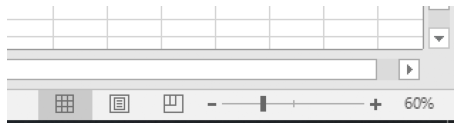

In [ ]:
# cour new excel
img = mpimg.imread('images/img_34.PNG')
plt.imshow(img)
plt.axis('off')
plt.show()

## *Headers formatting*

In [204]:
# iterate through df columns with enumerate
for col_num, value in enumerate(df.columns):
    print(col_num, value)

0 Name
1 Orange
2 Banana
3 Apples
4 Kiwi
5 Column Total


In [223]:
# Add a header format.

# define what format you want to apply
header_format = workbook.add_format({
    'bold': True,
    'text_wrap': True,
    'valign': 'top',
    'fg_color': '#0033cc', # bright blue 
    'border': 1})

# Write the column headers with the defined format.
for col_num, value in enumerate(df.columns.values):
    worksheet.write(0, # on what row
                    col_num, # which column
                    value, # value to write
                    header_format) # format to apply



In [206]:
# uncomment if you want to save and close workbook

'''
# save the excel object
writer.save()

# if you want to open the excel file you have to close the workbook first with workbook.close()
workbook.close()  # close the workbook

'''


'\n# save the excel object\nwriter.save()\n\n# if you want to open the excel file you have to close the workbook first with workbook.close()\nworkbook.close()  # close the workbook\n\n'

In [224]:
# format of headers : bold, bright blue, border 1, text_wrap, vertical alignment 'Top'
img = mpimg.imread('images/img_35.PNG')
plt.imshow(img)
plt.axis('off')
plt.show()

FileNotFoundError: ignored

# Charts

In [225]:
# Create a stacked chart sub-type.

stacked_chart = workbook.add_chart({'type': 'column', # what type of chart we want
                                    'subtype': 'stacked'}) # what subtype of chart we want

In [226]:
# stacked chart
img = mpimg.imread('images/img_36.PNG')
plt.imshow(img)
plt.axis('off')
plt.show()

FileNotFoundError: ignored

In [227]:
# Add a data series to a chart.
# format the series of the chart

# Configure the first series.  == > Oranges
stacked_chart.add_series({
    # name of series
    'name':  '= Groceries!$B$1', # the ref with the name of serie ==> oranges
    # categories of the series (here will be the names)
    'categories': '=Groceries!$A$2:$A$19', # the serie will be splitted by categories (the names), so we need to pass the range where to get the categories
    # values of the serie categories
    'values':     '=Groceries!$B$2:$B$19', # the serie value, so we need to pass to the range 
    # format x axis labels
    'data_labels': {'value': True,
                    'font': {'bold': False,
                             'size': 10,
                             'color': 'black',
                             'rotation': -30}},
    # set the colors for the categorries
    'fill': {'color': 'lime', 'transparency': 20}
})

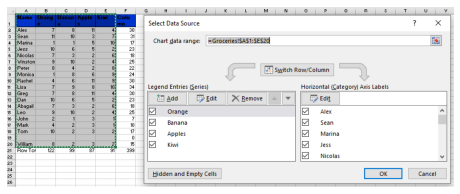

In [ ]:
# building a serie
img = mpimg.imread('images/img_37.PNG')
plt.imshow(img)
plt.axis('off')
plt.show()

In [228]:
# Configure second series.  ==> Bananas
stacked_chart.add_series({
    'name':       '=Groceries!$C$1', # banana
    'categories': '=Groceries!$A$2:$A$19',
    'values':     '=Groceries!$C$2:$C$19',
    'data_labels': {'value': False,
                    'font': {'bold': False,
                             'size': 10,
                             'color': 'black',
                             'rotation': -30}},
    'fill': {'color': 'red', 'transparency': 20}
})

# Configure 3rd series. == > Apples
stacked_chart.add_series({
    'name':       '=Groceries!$D$1', # apples
    'categories': '=Groceries!$A$2:$A$19',
    'values':     '=Groceries!$D$2:$D$19',
    'data_labels': {'value': True,
                    'font': {'bold': False,
                             'size': 10,
                             'color': 'black',
                             'rotation': -30}},
    'fill': {'color': 'blue', 'transparency': 20}
})




# Configure 4th series. ==> Kiwi
stacked_chart.add_series({
    'name':       '=Groceries!$E$1', # kiwi
    'categories': '=Groceries!$A$2:$A$19',
    'values':     '=Groceries!$E$2:$E$19',
    'data_labels': {'value': True,
                    'font': {'bold': False,
                             'size': 10,
                             'color': 'black',
                             'rotation': -30}},
    'fill': {'color': 'green', 'transparency': 20}
})


In [229]:
# save and close

'''

writer.save()
workbook.close()

'''

'\n\nwriter.save()\nworkbook.close()\n\n'

In [230]:
# Add a chart title and the axis labels.
stacked_chart.set_title ({'name': 'Stacked Chart'}) # chart title
stacked_chart.set_y_axis({'name': 'Fruits'}) # label for axis Y

In [ ]:
# save and close

'''

writer.save()
workbook.close()

'''

'\n\nwriter.save()\nworkbook.close()\n\n'

In [231]:
# Set an Excel chart style.
stacked_chart.set_style(12) # An index representing the chart style.(from 1 to 48 styles)


# format x axis
stacked_chart.set_x_axis({
    'name': 'Fruits per Name',
    'name_font': {'size': 12, 'bold': True},
    'num_font':  {'italic': True },
})

# set legend position
stacked_chart.set_legend({'position': 'bottom'})


# Insert the chart into the worksheet at cell H2.
worksheet.insert_chart('H2', # location were to insert chart
                       stacked_chart)

# ...when you have a 0 as an input , it means that there were no erros

0

In [232]:
# final output
img = mpimg.imread('images/img_38.PNG')
plt.imshow(img)
plt.axis('off')
plt.show()

FileNotFoundError: ignored

In [233]:
# save and close
writer.save()
workbook.close()

/usr/local/lib/python3.8/dist-packages/xlsxwriter/workbook.py:1658: UserWarning: Unknown worksheet reference ' Groceries' in range ' Groceries!$B$1' passed to add_series()
  warn("Unknown worksheet reference '%s' in range "
/usr/local/lib/python3.8/dist-packages/xlsxwriter/workbook.py:339: UserWarning: Calling close() on already closed file.
  warn("Calling close() on already closed file.")


In [234]:
os.listdir()

['images',
 'Groceries.xlsx',
 'Excel_processing_Basics_Colab_Module_3_backup.ipynb',
 'Groceries_1.xlsx',
 'Groceries_2_pandas.xlsx',
 'Groceries_Formated.xlsx']